In [1]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)

def plot_column(df_column, label, column_name):
    plt.figure(figsize=(14, 7))
    plt.plot(df_column, label=label)
    plt.xlabel('Index')
    plt.ylabel(column_name)
    plt.title(f'{column_name} from Multiple Files')
    plt.legend()
    plt.show()
    
def extract_and_plot(df, column_name, trunc_value, use_index=False):    
    # Sort the DataFrame by the specified column
    df_sorted = df.sort_values('file_short').head(trunc_value)
    
    if use_index:
        index = list(range(1, len(df) + 1))
    # Plot the value column against the sorted string column
    plt.figure(figsize=(10, 6))
    if use_index:
        plt.plot(index, df_sorted[column_name], marker='o')
    else:    
        plt.plot(df_sorted['file_short'], df_sorted[column_name], marker='o')
    plt.xlabel('filename')
    plt.ylabel(column_name)
    plt.title(f'Value Column by Ordered String Column ({column_name})')
    plt.grid(True)
    plt.show()

    
column_stats_linear = [
        "manhattan",
        "kl_div",
        "euclidian",
        "cosine_dist",
        "bhattacharyya"
]


column_stats_log = [
        "hamming",
        "chebyshev"
]

stats_column_names = [
        "manhattan",
        "kl_div",
        "hamming",
        "euclidian",
        "chebyshev",
        "cosine_dist",
        "bhattacharyya"
]

aggregated_rewards_rotate = '/Users/victor/Documents/python-projects/smart-rl/aggregate/rotate/episode-rewards-rotate-all.csv'
df_rewards_rotate = pd.read_csv(aggregated_rewards_rotate)
column_sums_rotate = df_rewards_rotate.sum()

# Sort the columns by their sums in descending order
sorted_columns_rotate = column_sums_rotate.sort_values(ascending=False).index
print('...printing SUM Rewards per evaluation...')
for column in sorted_columns_rotate:
    print(f"{column_sums_rotate[column]:20.11f} | {column}")
    
    
column_max_rot = df_rewards_rotate.max()

# Sort the columns by their sums in descending order
sorted_max_columns_contrast = column_max_rot.sort_values(ascending=False).index
print()
print('...printing MAX Reqards per evaluation...')
for column in sorted_max_columns_contrast:
    print(f"{column_max_rot[column]:20.11f} | {column}")

...printing SUM Rewards per evaluation...
   72456.90000000001 | drqv2_aug_pixels-True-rotate-0.7
   72217.79999999999 | drqv2_aug_pixels-True-rotate-2.5
   66556.70000000000 | drqv2_aug_pixels-True-rotate-2
   65729.50000000000 | drqv2_aug_pixels-True-rotate-1.5
   65045.79999999999 | drqv2_aug_pixels-True-rotate-0.8
   63559.50000000001 | drqv2_aug_pixels-True-rotate-0.9
   63051.39999999999 | drqv2_aug_pixels-True-rotate-1.8
   62481.10000000000 | drqv2_aug_pixels-True-rotate-1.9
   62133.80000000000 | drqv2_aug_pixels-True-rotate-0.2
   61872.50000000001 | drqv2_aug_pixels-True-rotate-0.5
   60589.60000000000 | drqv2_aug_pixels-True-rotate-0.3
   58597.80000000000 | drqv2_aug_pixels-True-rotate-0.4
   52853.20000000000 | drqv2_aug_pixels-True-rotate-0.6
   38783.70000000001 | drqv2_aug_pixels-True-rotate-1
   38083.80000000000 | drqv2_aug_pixels-True-rotate-1.6
   34662.90000000000 | drqv2_aug_pixels-True-rotate-1.1
   29473.50000000000 | drqv2_aug_pixels-True-rotate-0.1
    8701.3

In [2]:
aggregated_rewards_shift = '/Users/victor/Documents/python-projects/smart-rl/aggregate/shift/episode-rewards-shift-seed-2-all.csv'
# aggregated_rewards_shift = '/Users/victor/Documents/python-projects/smart-rl/aggregate/shift/episode-rewards-shift-all.csv'
df_rewards_shift = pd.read_csv(aggregated_rewards_shift)
column_sums_shift = df_rewards_shift.sum()

# Sort the columns by their sums in descending order
sorted_columns_shift = column_sums_shift.sort_values(ascending=False).index
print('...printing SUM Rewards per evaluation...')
for column in sorted_columns_shift:
    print(f"{column_sums_shift[column]:20.11f} | {column}")
    
    
column_max_shift = df_rewards_shift.max()

# Sort the columns by their sums in descending order
sorted_max_columns_shift = column_max_shift.sort_values(ascending=False).index
print()
print('...printing MAX Reqards per evaluation...')
for column in sorted_max_columns_shift:
    print(f"{column_max_shift[column]:20.11f} | {column}")

...printing SUM Rewards per evaluation...
   85182.29999999999 | drqv2_pad_2_pixels-True
   84801.09999999999 | drqv2_pad_3_pixels-True
   81438.80000000000 | drqv2_pad_4_pixels-True
   79889.10000000001 | drqv2_pad_6_pixels-True
   73843.49999999999 | drqv2_pad_5_pixels-True
   69658.40000000001 | drqv2_pad_1_pixels-True
   60971.90000000001 | drqv2_pad_10_pixels-True
   50068.30000000000 | drqv2_pixels-True
   49783.09999999999 | drqv2_pad_7_pixels-True
   43396.70000000001 | drqv2_pad_8_pixels-True
   18969.30000000000 | drqv2_pad_9_pixels-True

...printing MAX Reqards per evaluation...
     915.30000000000 | drqv2_pad_3_pixels-True
     914.90000000000 | drqv2_pad_2_pixels-True
     914.60000000000 | drqv2_pad_5_pixels-True
     913.90000000000 | drqv2_pad_6_pixels-True
     912.70000000000 | drqv2_pad_4_pixels-True
     907.20000000000 | drqv2_pad_8_pixels-True
     906.30000000000 | drqv2_pad_10_pixels-True
     902.90000000000 | drqv2_pad_1_pixels-True
     902.40000000000 | drq

In [3]:
aggregated_rewards_contrast = '/Users/victor/Documents/python-projects/smart-rl/aggregate/contrast/episode-rewards-contrast-seed-2-all.csv'
df_rewards_contrast = pd.read_csv(aggregated_rewards_contrast)
column_sums_contrast = df_rewards_contrast.sum()

# Sort the columns by their sums in descending order
sorted_columns_contrast = column_sums_contrast.sort_values(ascending=False).index
print('...printing SUM Rewards per evaluation...')
for column in sorted_columns_contrast:
    print(f"{column_sums_contrast[column]:20.11f} | {column}")
    
    
column_max_contrast = df_rewards_contrast.max()

# Sort the columns by their sums in descending order
sorted_max_columns_contrast = column_max_contrast.sort_values(ascending=False).index
print()
print('...printing MAX Reqards per evaluation...')
for column in sorted_max_columns_contrast:
    print(f"{column_max_contrast[column]:20.11f} | {column}")

...printing SUM Rewards per evaluation...
   76014.89999999999 | drqv2_aug_pixels-True-contrast-0.8
   70814.30000000000 | drqv2_aug_pixels-True-contrast-0.7
   63753.40000000000 | drqv2_aug_pixels-True-contrast-1.0
   58893.10000000001 | drqv2_aug_pixels-True-contrast-0.9
   53485.89999999999 | drqv2_aug_pixels-True-contrast-0.6
   50125.60000000001 | drqv2_aug_pixels-True-contrast-0.5
   48104.40000000000 | drqv2_aug_pixels-True-contrast-1.1
   26420.70000000000 | drqv2_aug_pixels-True-contrast-1.4
   15578.30000000000 | drqv2_aug_pixels-True-contrast-1.2
   14749.60000000000 | drqv2_aug_pixels-True-contrast-1.3
   12496.40000000000 | drqv2_aug_pixels-True-contrast-0.2
    8984.20000000000 | drqv2_aug_pixels-True-contrast-1.6
    7463.00000000000 | drqv2_aug_pixels-True-contrast-0.3
    5305.20000000000 | drqv2_aug_pixels-True-contrast-1.8
    3648.80000000000 | drqv2_aug_pixels-True-contrast-1.7
    1515.70000000000 | drqv2_aug_pixels-True-contrast-1.9
    1513.00000000000 | drqv2_a

In [5]:
aggregated_rewards_zoom = '/Users/victor/Documents/python-projects/smart-rl/aggregate/zoom/episode-rewards-zoom-all.csv'
df_rewards_zoom = pd.read_csv(aggregated_rewards_zoom)
column_sums_zoom = df_rewards_zoom.sum()

# Sort the columns by their sums in descending order
sorted_columns_zoom = column_sums_zoom.sort_values(ascending=False).index
print('...printing SUM Rewards per evaluation...')
for column in sorted_columns_zoom:
    print(f"{column_sums_zoom[column]:20.11f} | {column}")
    
    
column_max_zoom = df_rewards_zoom.max()

# Sort the columns by their sums in descending order
sorted_max_columns_zoom = column_max_zoom.sort_values(ascending=False).index
print()
print('...printing MAX Reqards per evaluation...')
for column in sorted_max_columns_zoom:
    print(f"{column_max_zoom[column]:20.11f} | {column}")

...printing SUM Rewards per evaluation...
   58722.10000000000 | drqv2_aug_pixels-True-zoom-1.0
   41065.90000000000 | drqv2_aug_pixels-True-zoom-0.95
   16077.60000000000 | drqv2_aug_pixels-True-zoom-1.05
    8569.20000000000 | drqv2_aug_pixels-True-zoom-1.2
    4780.50000000000 | drqv2_aug_pixels-True-zoom-1.1
    4234.50000000000 | drqv2_aug_pixels-True-zoom-0.9
    3485.60000000000 | drqv2_aug_pixels-True-zoom-1.3
    2535.20000000000 | drqv2_aug_pixels-True-zoom-1.9
    1857.30000000000 | drqv2_aug_pixels-True-zoom-2.5
    1602.00000000000 | drqv2_aug_pixels-True-zoom-2.0
    1360.20000000000 | drqv2_aug_pixels-True-zoom-1.6
    1265.30000000000 | drqv2_aug_pixels-True-zoom-1.5
    1016.30000000000 | drqv2_aug_pixels-True-zoom-0.4
     977.60000000000 | drqv2_aug_pixels-True-zoom-0.85
     866.10000000000 | drqv2_aug_pixels-True-zoom-0.8
     770.30000000000 | drqv2_aug_pixels-True-zoom-1.4
     716.20000000000 | drqv2_aug_pixels-True-zoom-0.7
     596.70000000000 | drqv2_aug_pixe

In [6]:
aggregated_rewards_sharp = '/Users/victor/Documents/python-projects/smart-rl/aggregate/sharp/episode-rewards-sharp-all.csv'
df_rewards_sharp = pd.read_csv(aggregated_rewards_sharp)
column_sums_sharp = df_rewards_sharp.sum()

# Sort the columns by their sums in descending order
sorted_columns_sharp = column_sums_sharp.sort_values(ascending=False).index
print('...printing SUM Rewards per evaluation...')
for column in sorted_columns_sharp:
    print(f"{column_sums_sharp[column]:20.11f} | {column}")
    
    
column_max_sharp = df_rewards_sharp.max()

# Sort the columns by their sums in descending order
sorted_max_columns_sharp = column_max_sharp.sort_values(ascending=False).index
print()
print('...printing MAX Reqards per evaluation...')
for column in sorted_max_columns_sharp:
    print(f"{column_max_sharp[column]:20.11f} | {column}")

...printing SUM Rewards per evaluation...
    1375.10000000000 | drqv2_aug_pixels-True-sharp-5
    1367.70000000000 | drqv2_aug_pixels-True-sharp-6
    1367.40000000000 | drqv2_aug_pixels-True-sharp-14
    1367.30000000000 | drqv2_aug_pixels-True-sharp-13
    1367.20000000000 | drqv2_aug_pixels-True-sharp-1
    1367.00000000000 | drqv2_aug_pixels-True-sharp-8
    1366.90000000000 | drqv2_aug_pixels-True-sharp-3
    1357.50000000000 | drqv2_aug_pixels-True-sharp-7
    1357.00000000000 | drqv2_aug_pixels-True-sharp-23
    1355.90000000000 | drqv2_aug_pixels-True-sharp-31
    1355.70000000000 | drqv2_aug_pixels-True-sharp-21
    1354.40000000000 | drqv2_aug_pixels-True-sharp-16
    1353.40000000000 | drqv2_aug_pixels-True-sharp-22
    1353.30000000000 | drqv2_aug_pixels-True-sharp-2
    1353.10000000000 | drqv2_aug_pixels-True-sharp-30
    1353.00000000000 | drqv2_aug_pixels-True-sharp-25
    1353.00000000000 | drqv2_aug_pixels-True-sharp-17
    1352.90000000000 | drqv2_aug_pixels-True-sh

In [8]:
aggregated_rewards_sharpmin = '/Users/victor/Documents/python-projects/smart-rl/aggregate/sharpmin/episode-rewards-sharpmin-all.csv'
df_rewards_sharpmin = pd.read_csv(aggregated_rewards_sharpmin)
column_sums_sharpmin = df_rewards_sharpmin.sum()

# Sort the columns by their sums in descending order
sorted_columns_sharpmin = column_sums_sharpmin.sort_values(ascending=False).index
print('...printing SUM Rewards per evaluation...')
for column in sorted_columns_sharpmin:
    print(f"{column_sums_sharpmin[column]:20.11f} | {column}")
    
    
column_max_sharpmin = df_rewards_sharpmin.max()

# Sort the columns by their sums in descending order
sorted_max_columns_sharpmin = column_max_sharpmin.sort_values(ascending=False).index
print()
print('...printing MAX Reqards per evaluation...')
for column in sorted_max_columns_sharpmin:
    print(f"{column_max_sharpmin[column]:20.11f} | {column}")

...printing SUM Rewards per evaluation...
    1360.90000000000 | drqv2_aug_pixels-True-sharpmin-5
    1352.70000000000 | drqv2_aug_pixels-True-sharpmin-10
    1349.80000000000 | drqv2_aug_pixels-True-sharpmin-9
    1333.70000000000 | drqv2_aug_pixels-True-sharpmin-6
    1333.30000000000 | drqv2_aug_pixels-True-sharpmin-0.4
    1333.30000000000 | drqv2_aug_pixels-True-sharpmin-0.6
    1330.90000000000 | drqv2_aug_pixels-True-sharpmin-0.1
    1328.80000000000 | drqv2_aug_pixels-True-sharpmin-0.2
    1324.80000000000 | drqv2_aug_pixels-True-sharpmin-0.7
    1302.70000000000 | drqv2_aug_pixels-True-sharpmin-0.8
    1294.20000000000 | drqv2_aug_pixels-True-sharpmin-4
    1291.70000000000 | drqv2_aug_pixels-True-sharpmin-2
    1290.00000000000 | drqv2_aug_pixels-True-sharpmin-3
    1287.80000000000 | drqv2_aug_pixels-True-sharpmin-8
    1280.20000000000 | drqv2_aug_pixels-True-sharpmin-0.3
    1237.00000000000 | drqv2_aug_pixels-True-sharpmin-0.5
    1168.80000000000 | drqv2_aug_pixels-True-

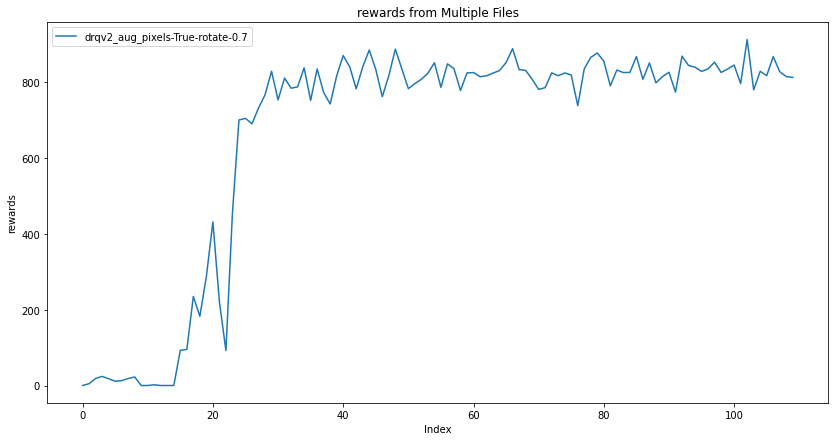

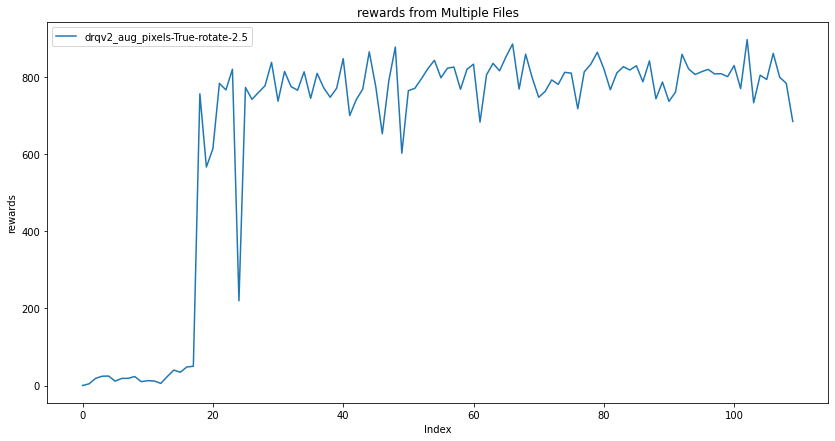

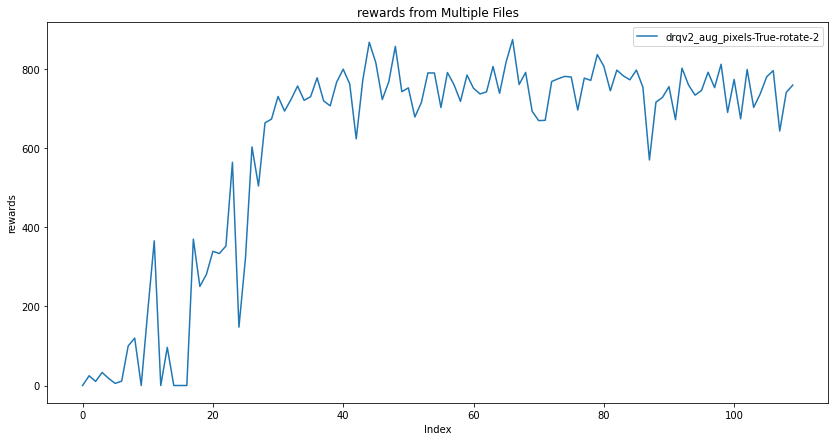

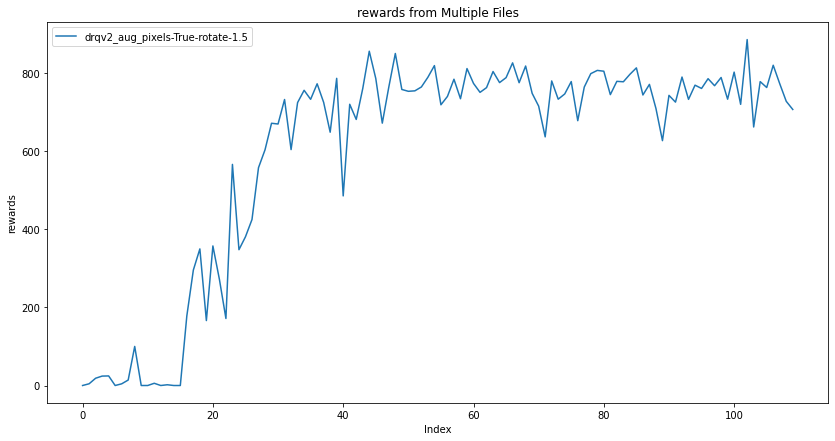

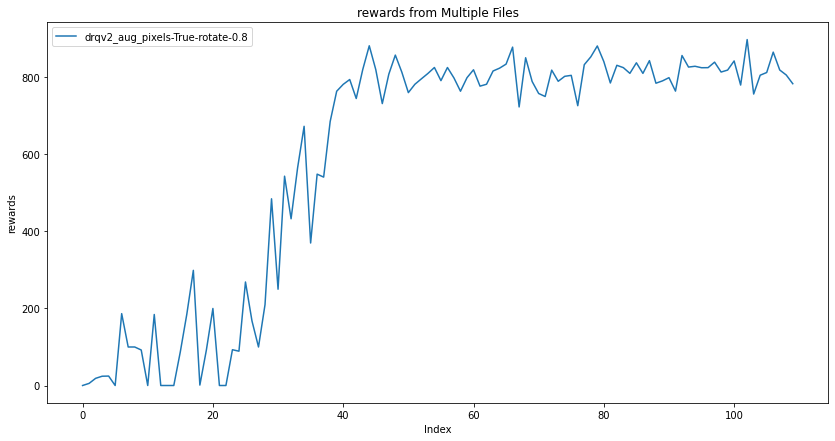

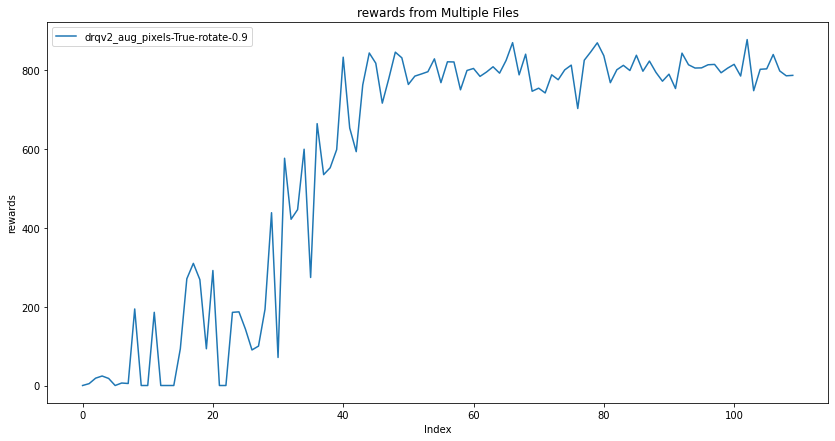

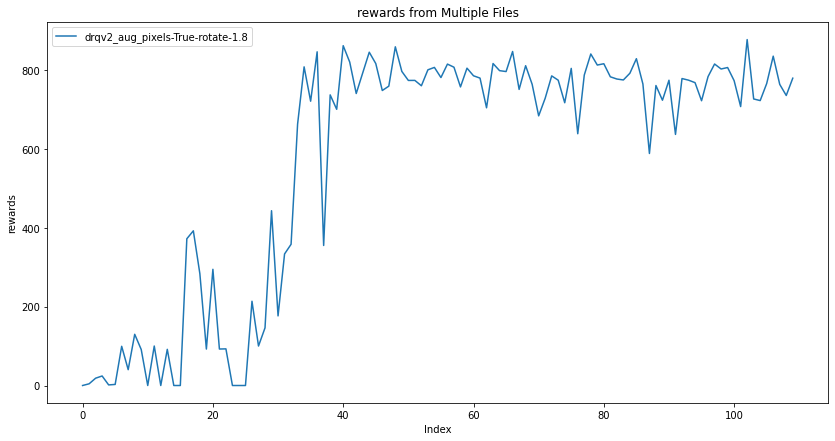

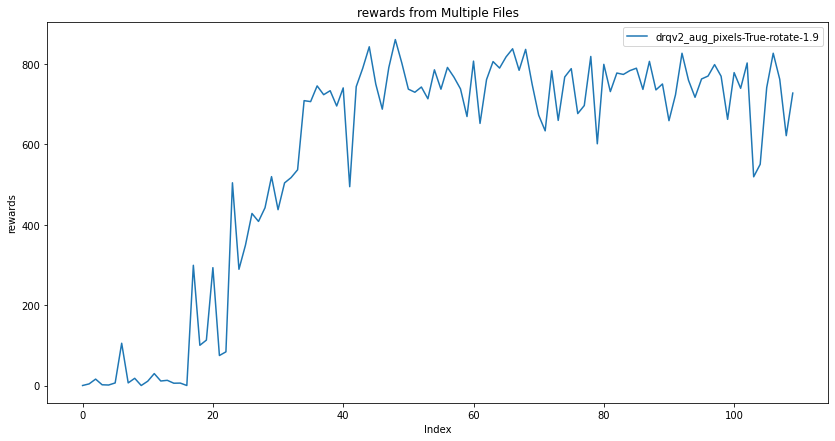

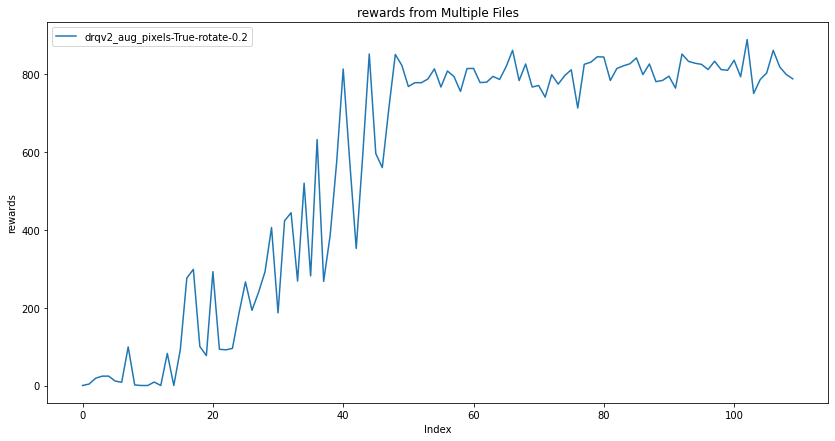

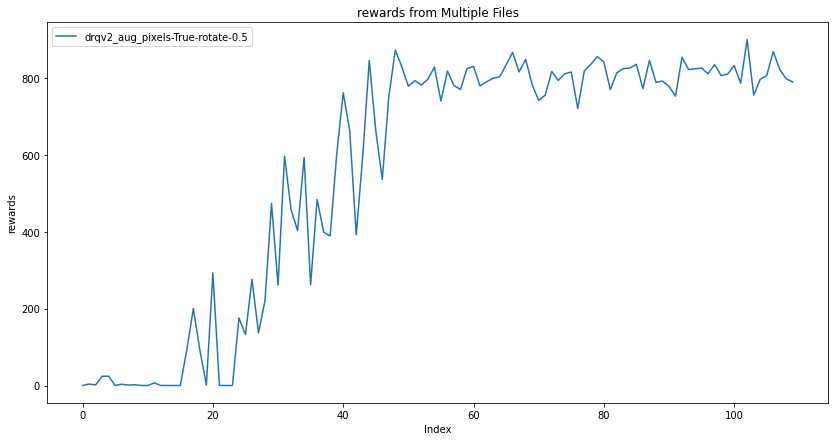

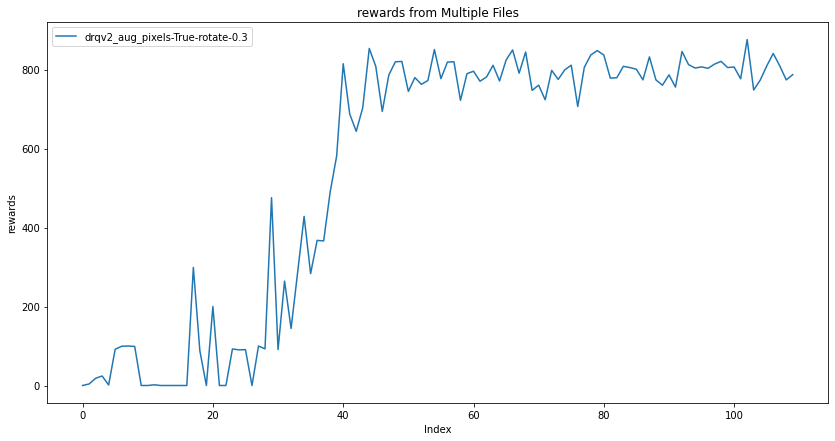

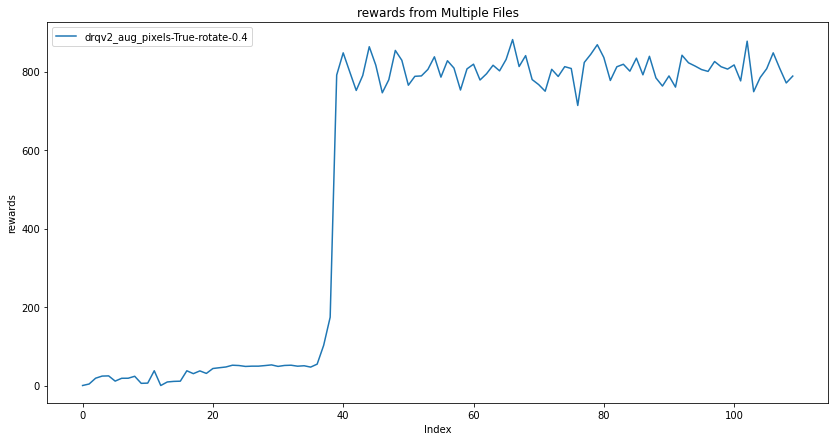

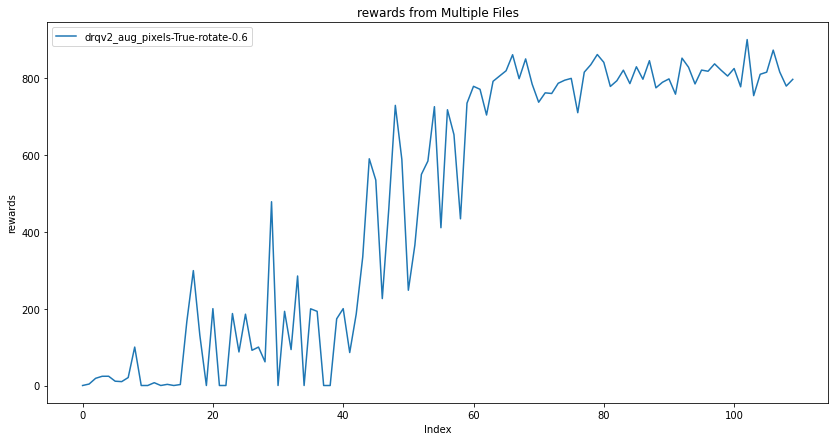

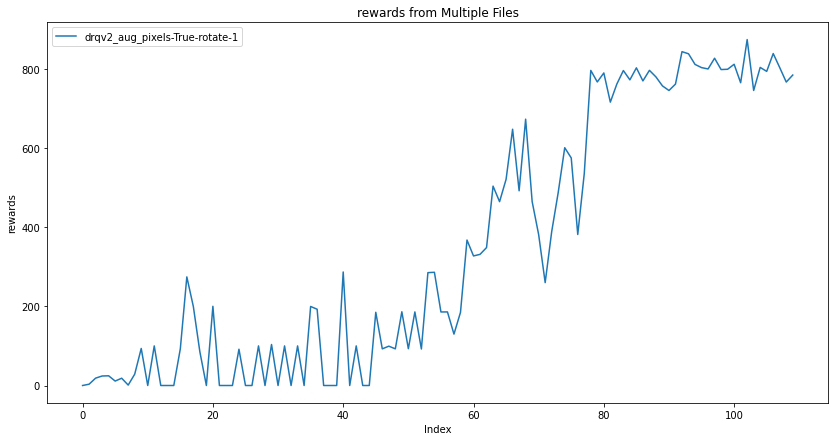

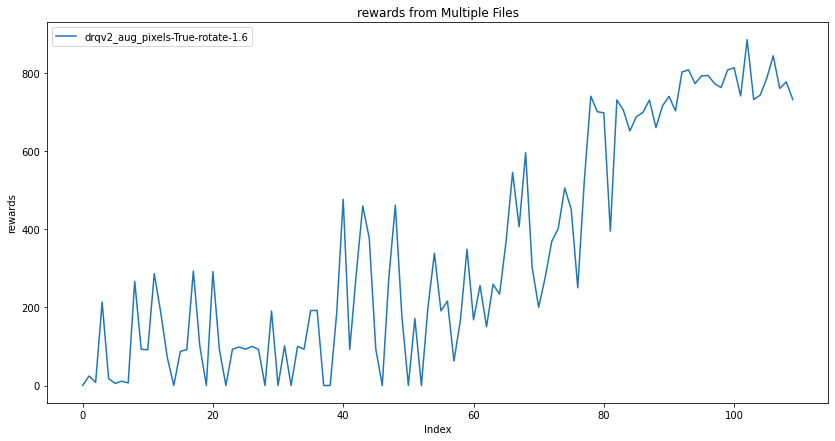

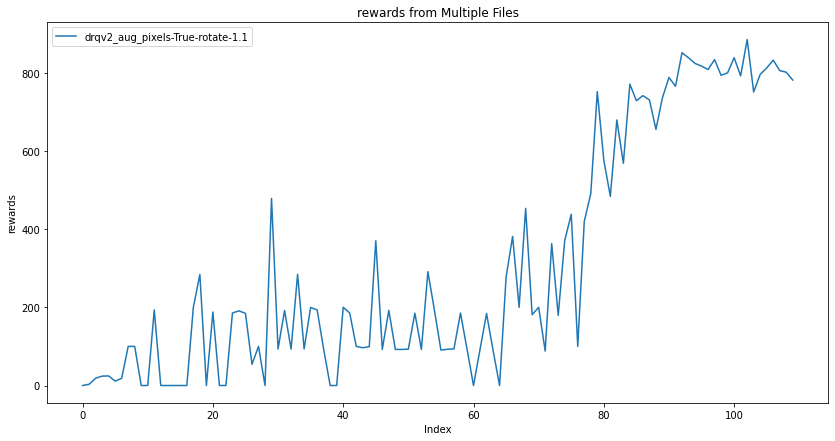

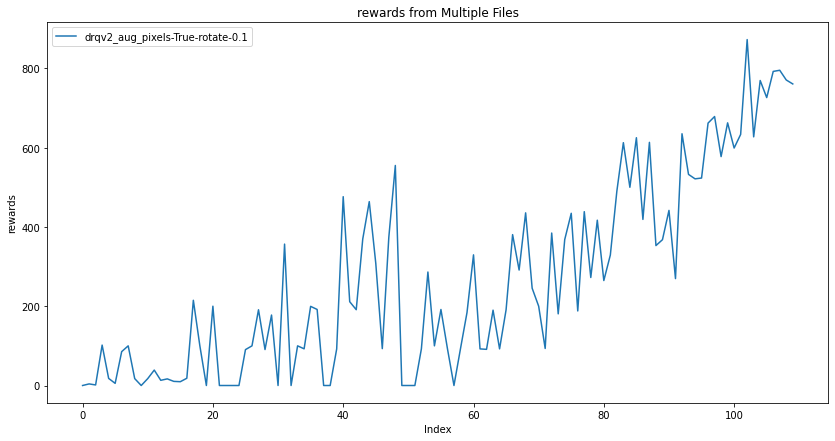

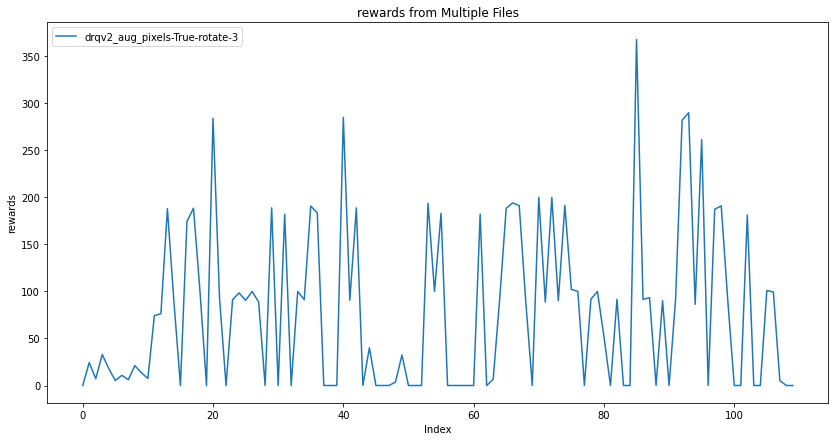

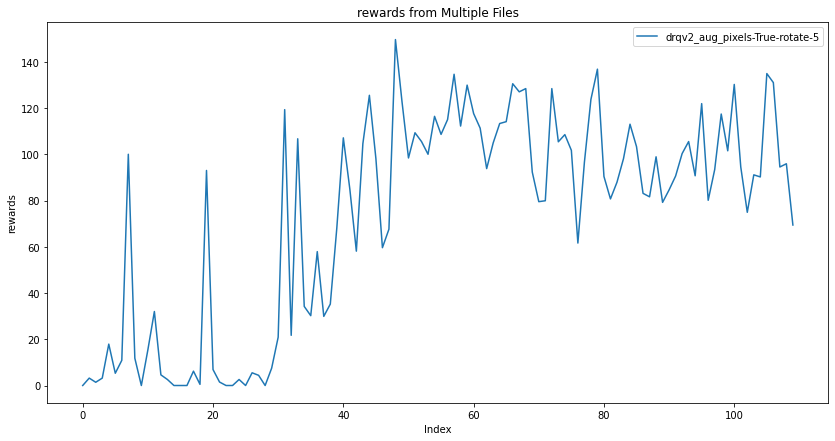

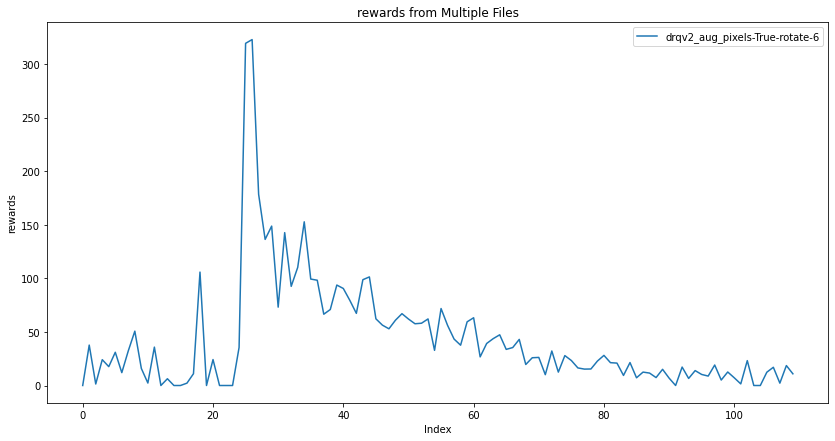

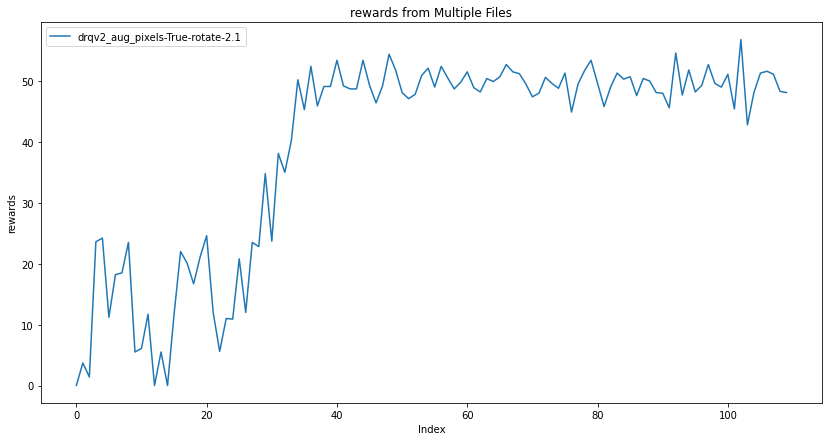

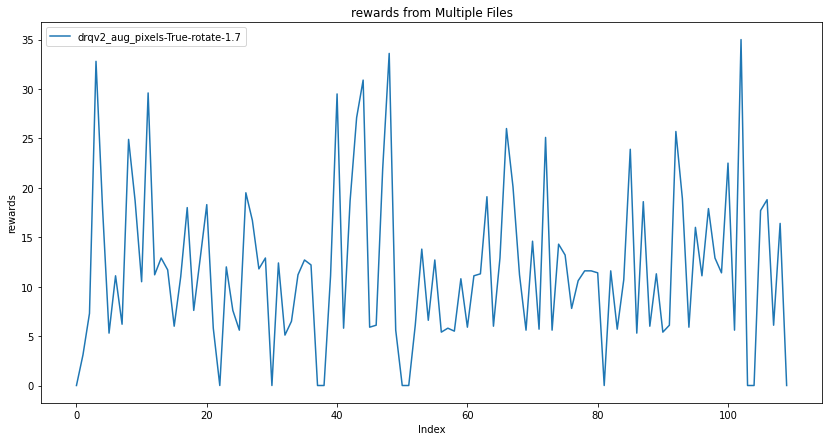

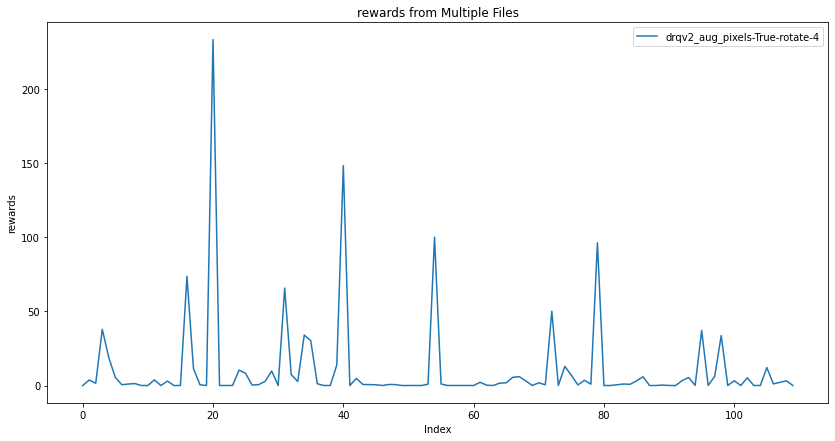

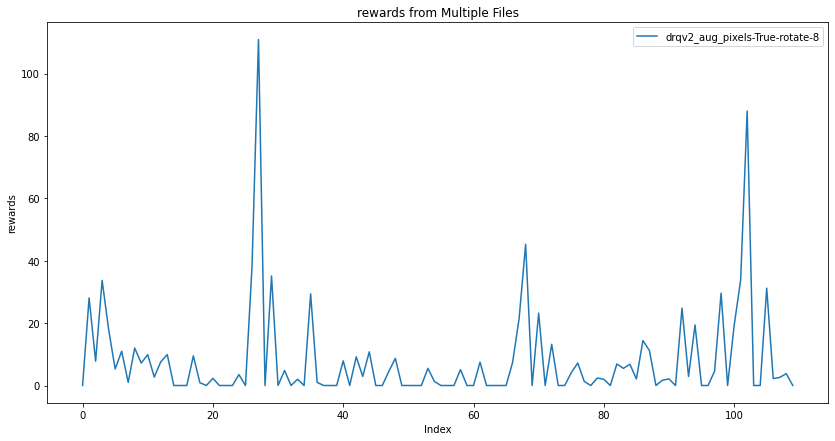

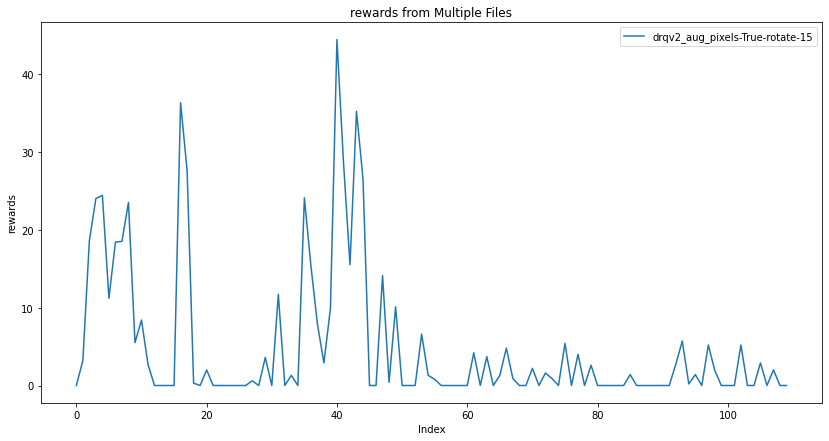

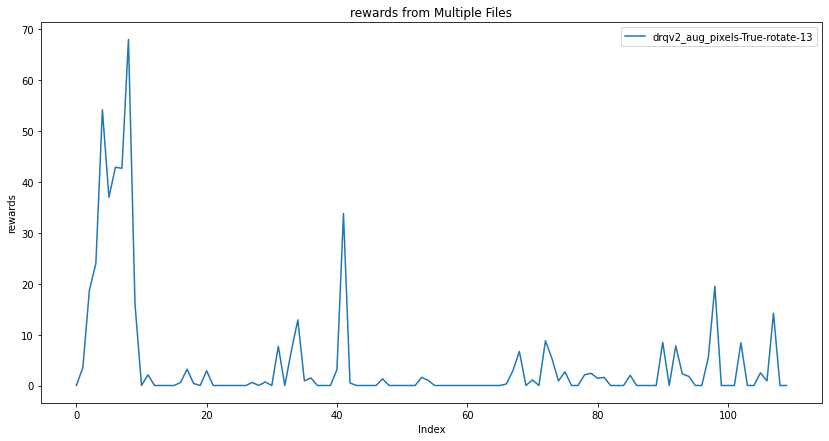

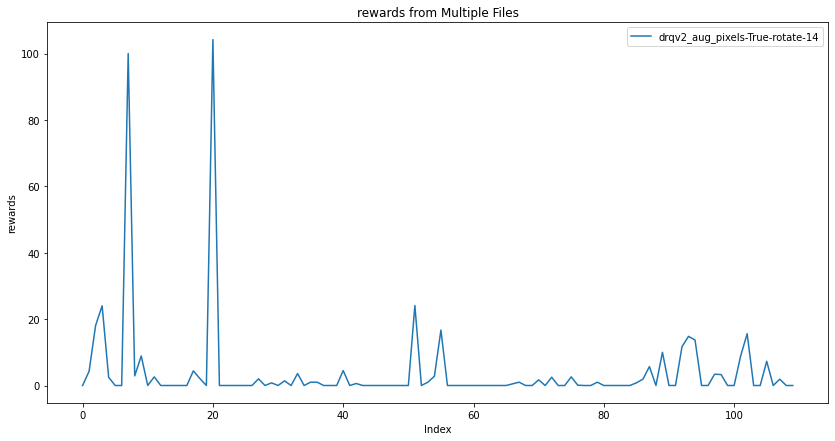

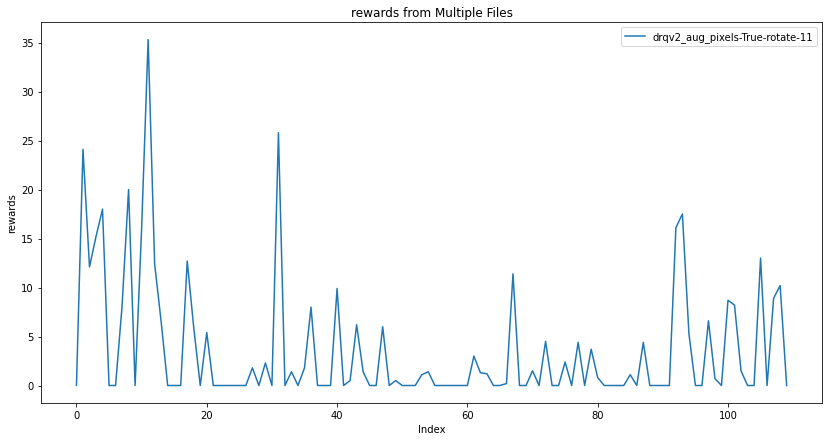

In [9]:
for column in sorted_columns_rotate:
    plot_column(df_rewards_rotate[column], column, 'rewards')

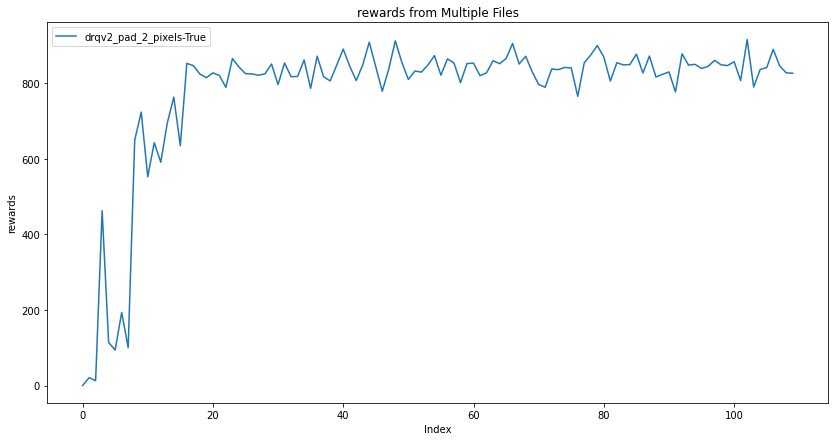

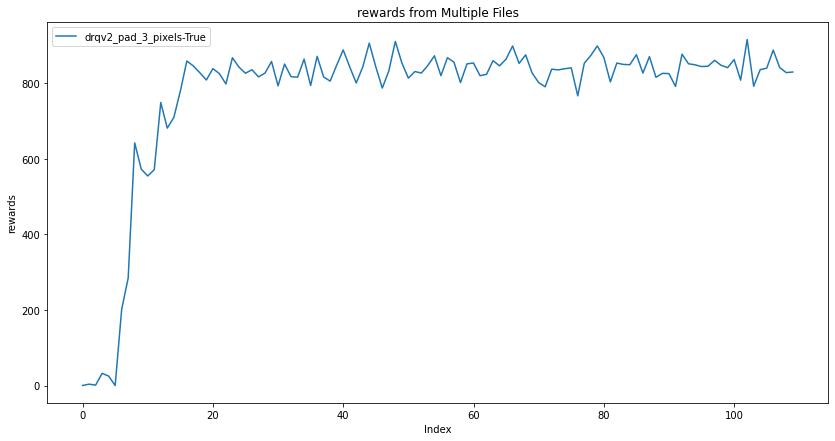

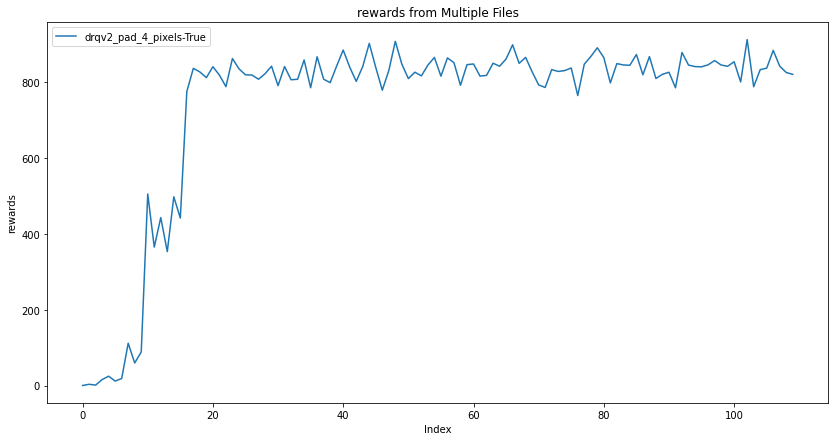

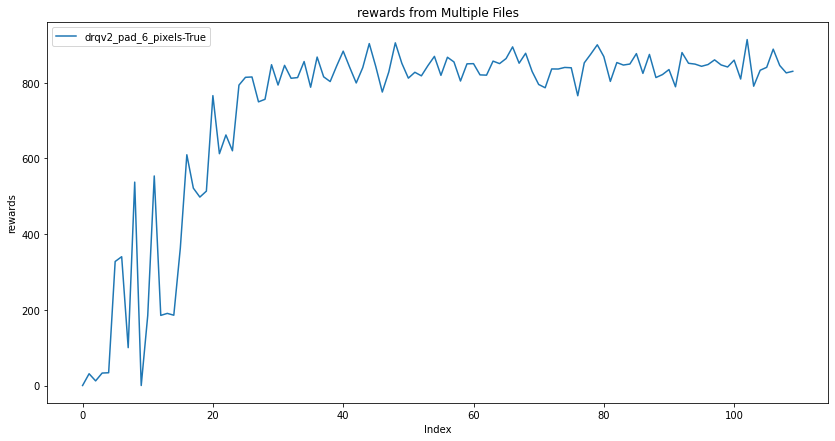

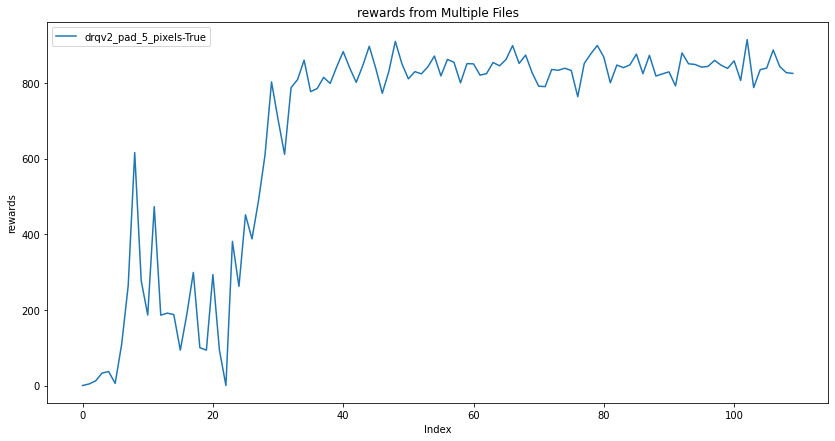

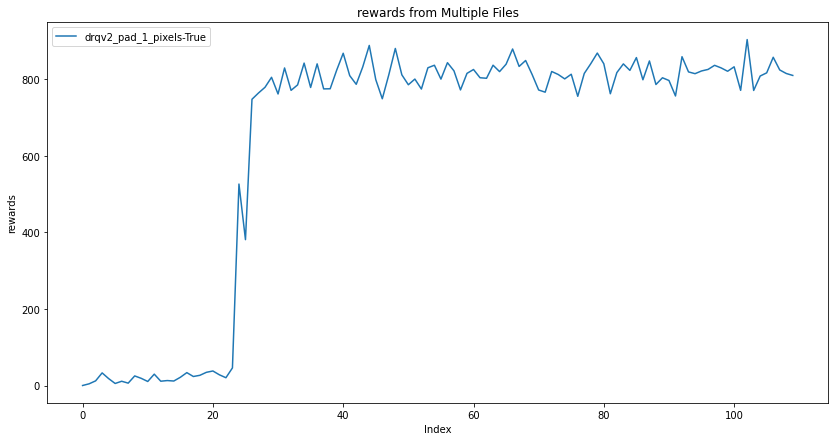

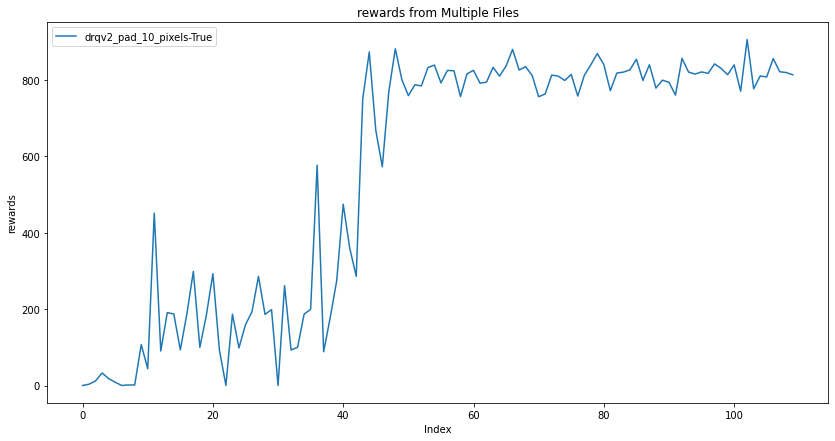

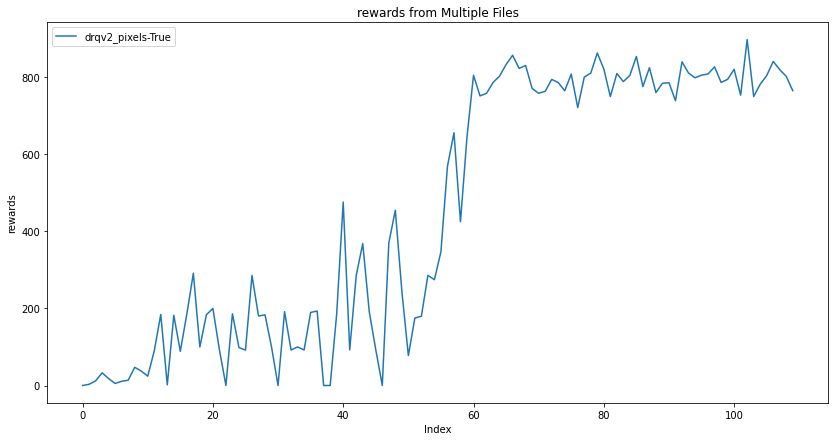

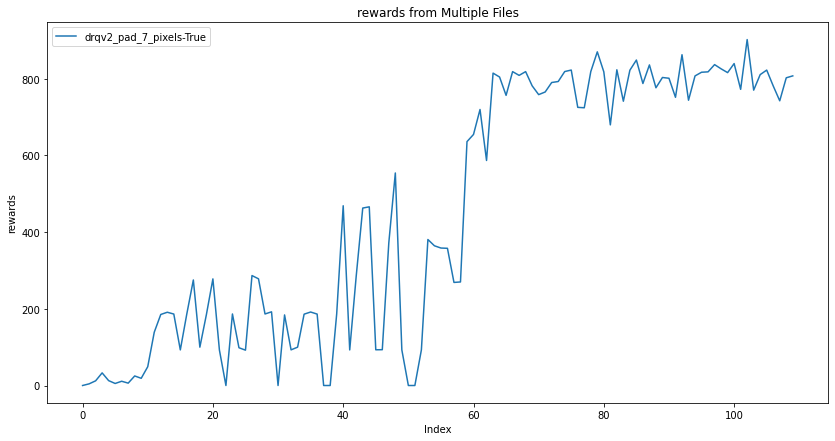

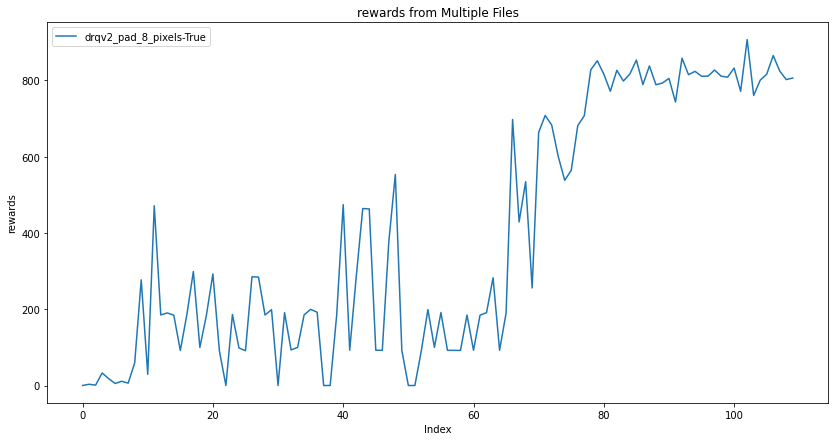

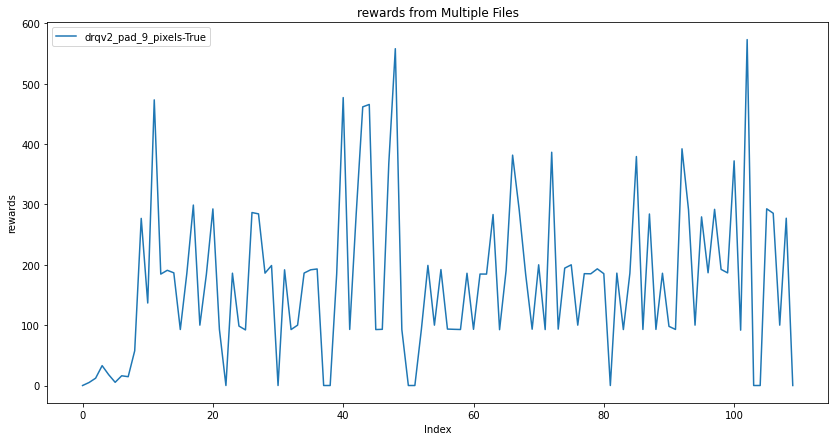

In [101]:
for column in sorted_columns_shift:
    plot_column(df_rewards_shift[column], column, 'rewards')

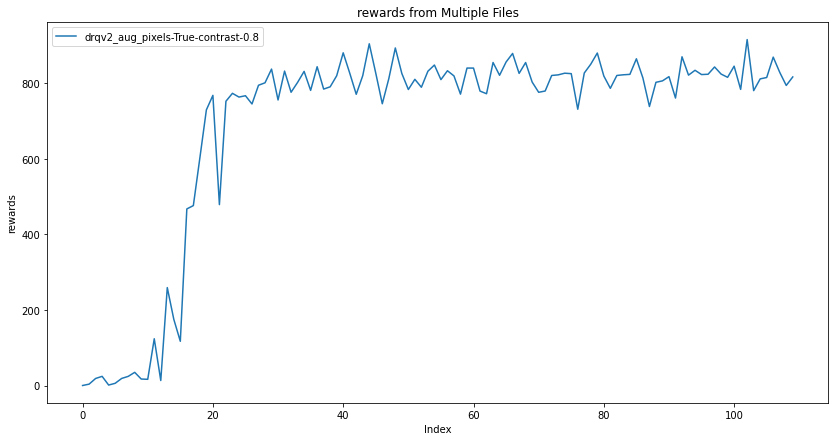

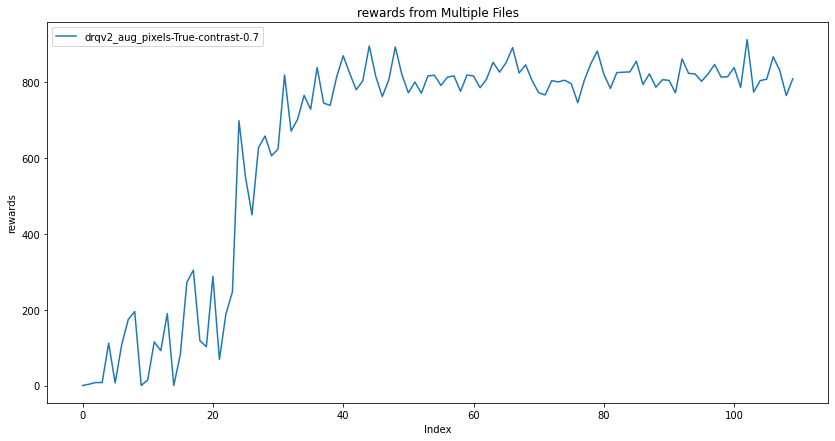

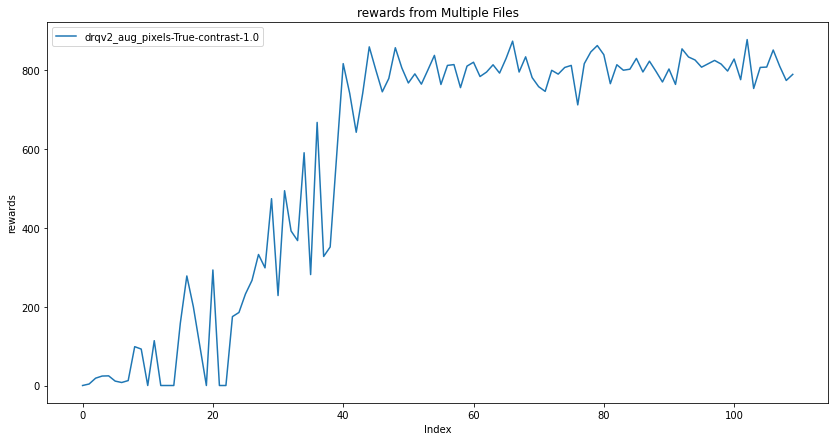

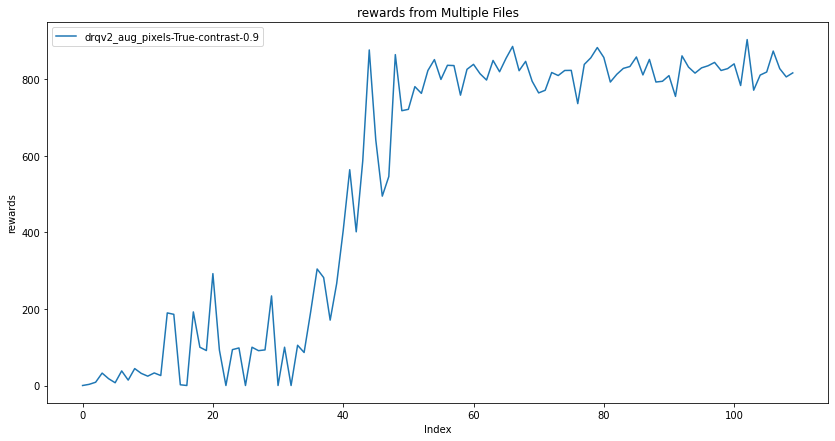

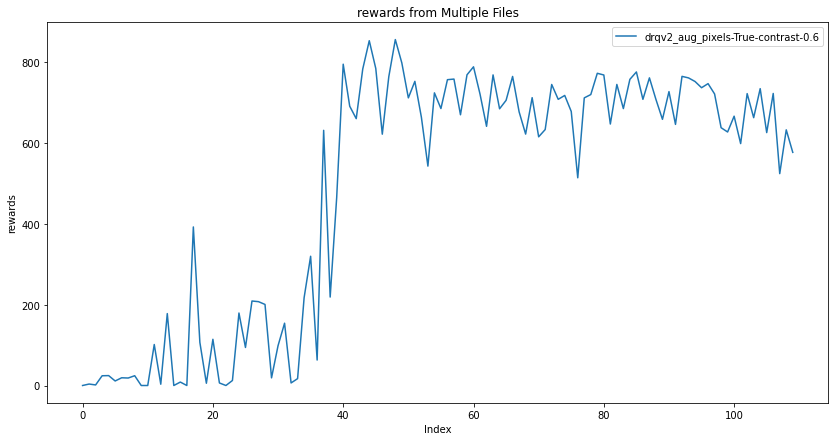

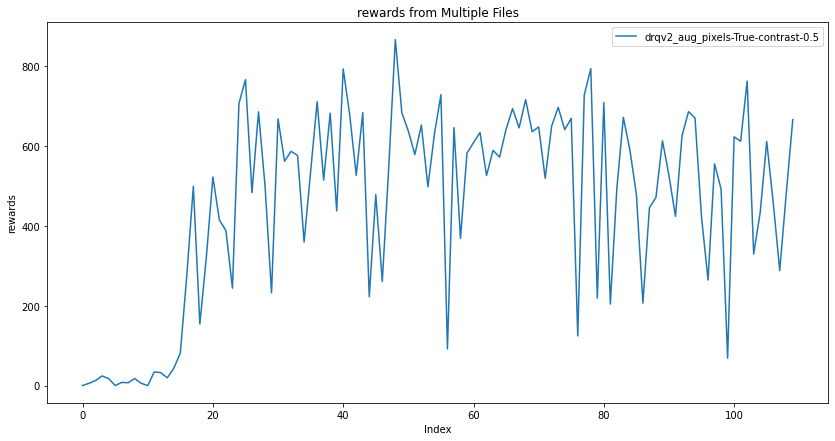

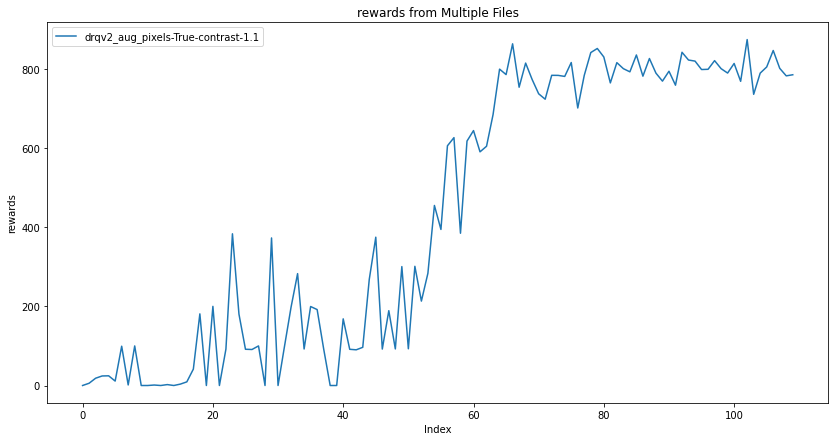

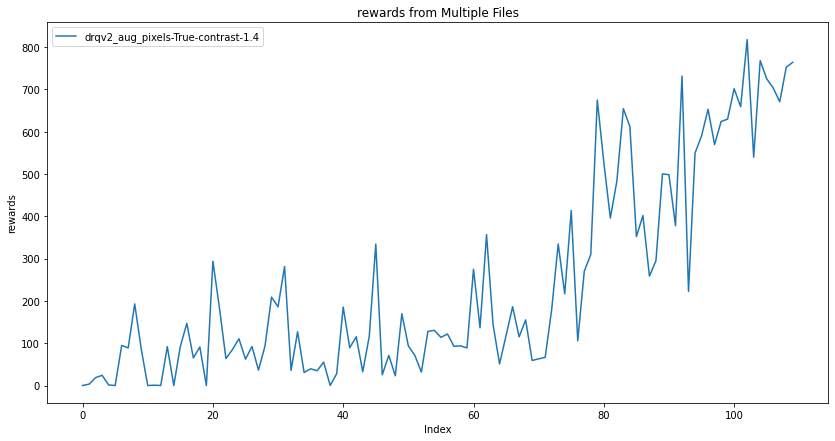

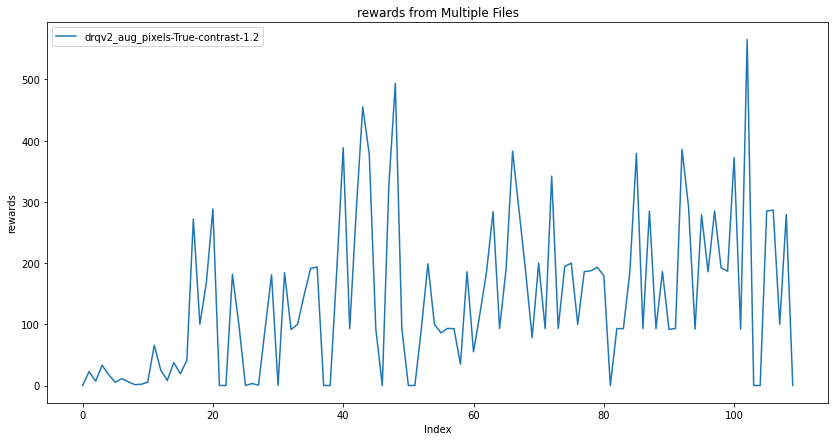

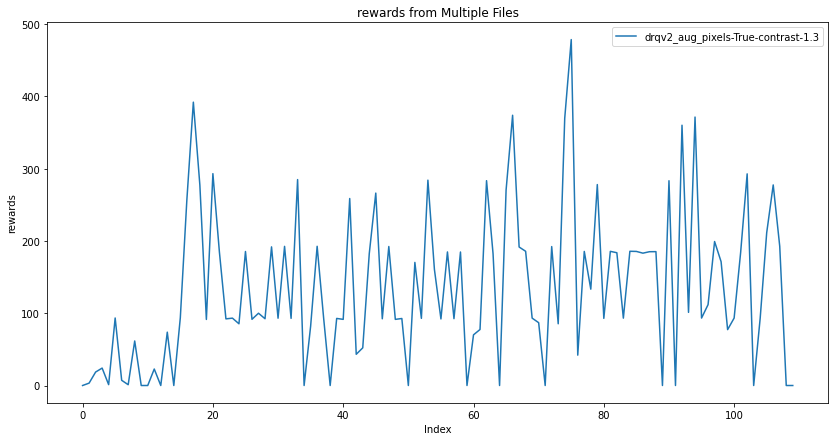

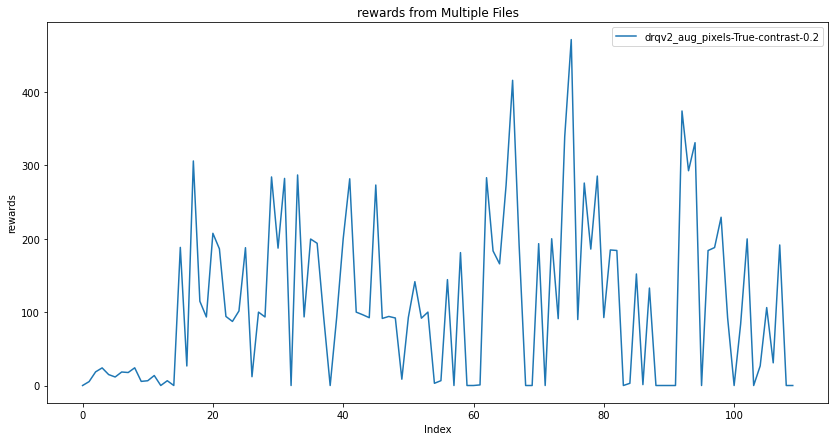

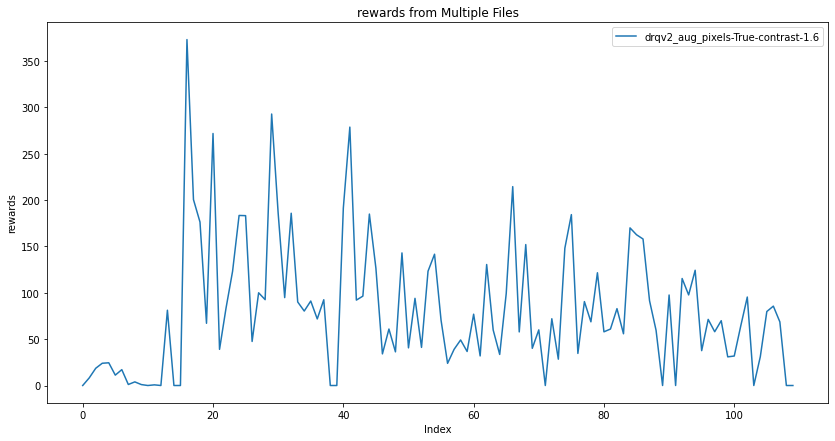

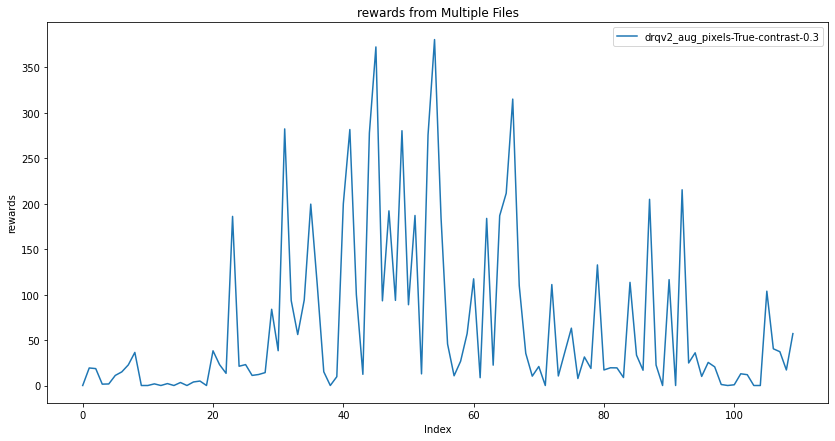

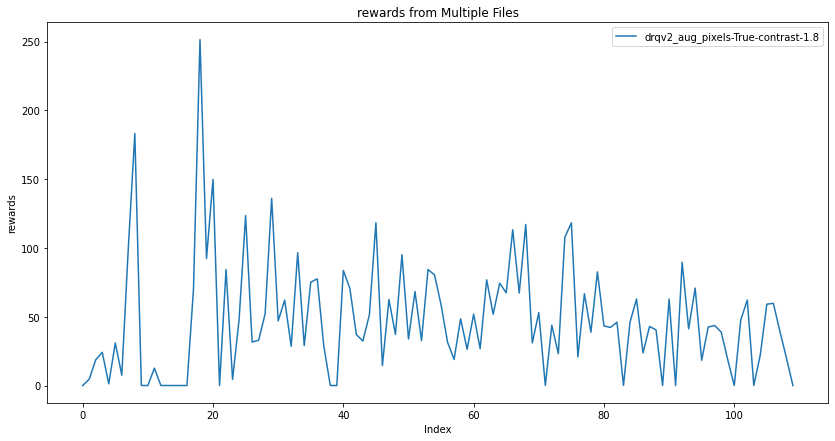

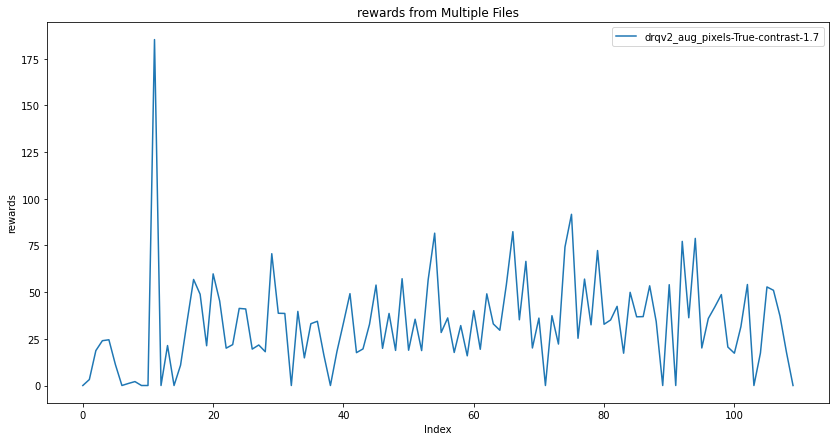

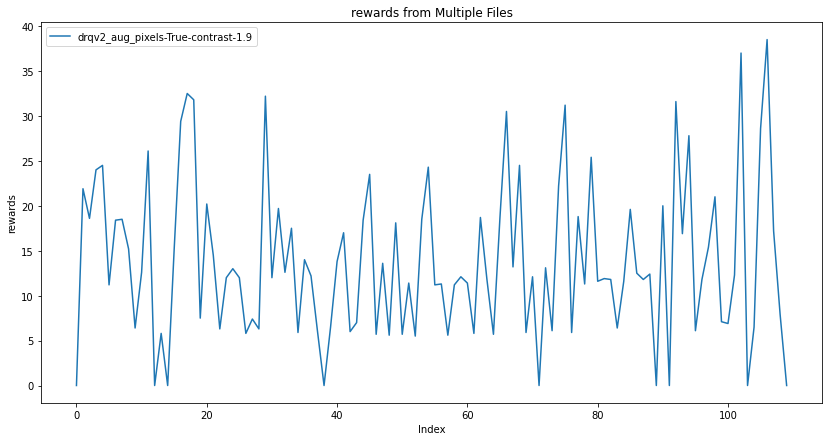

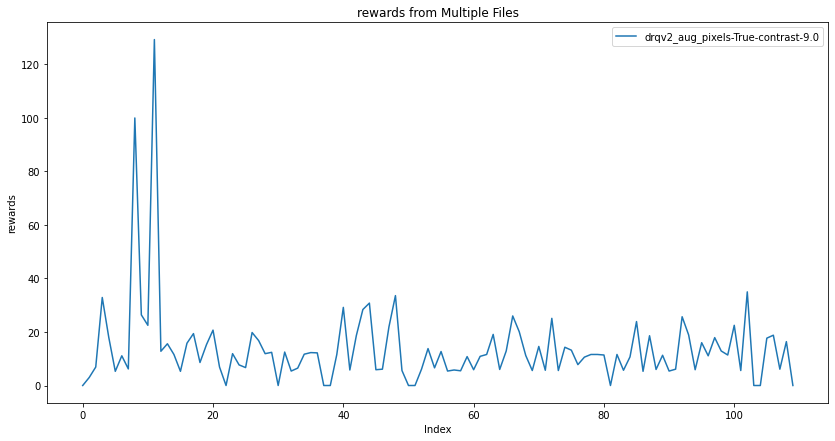

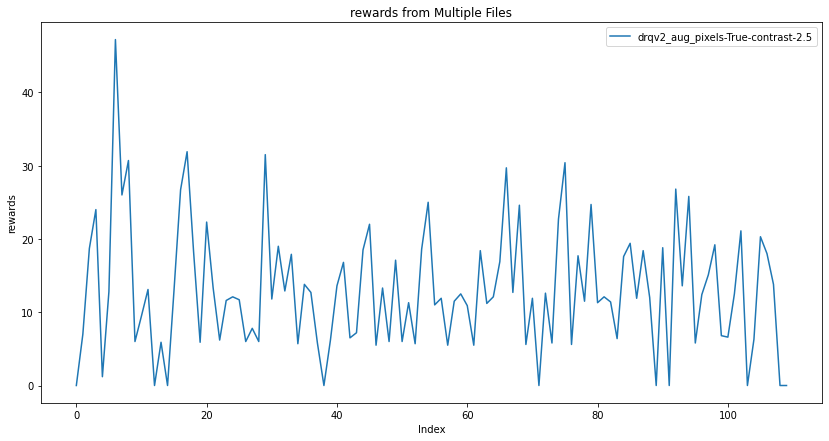

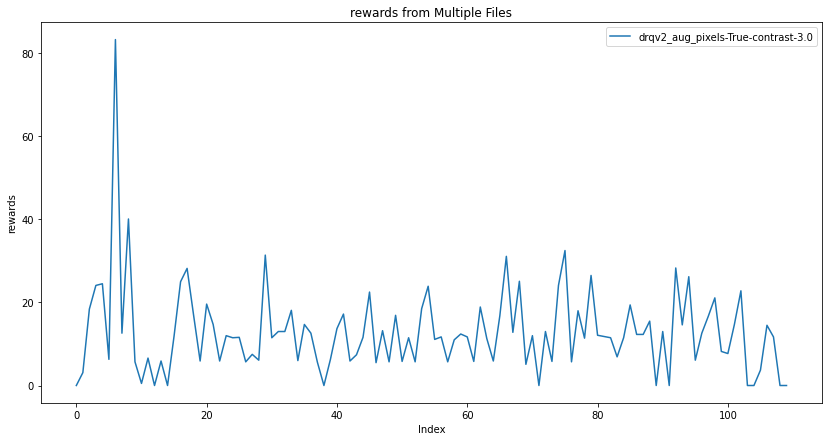

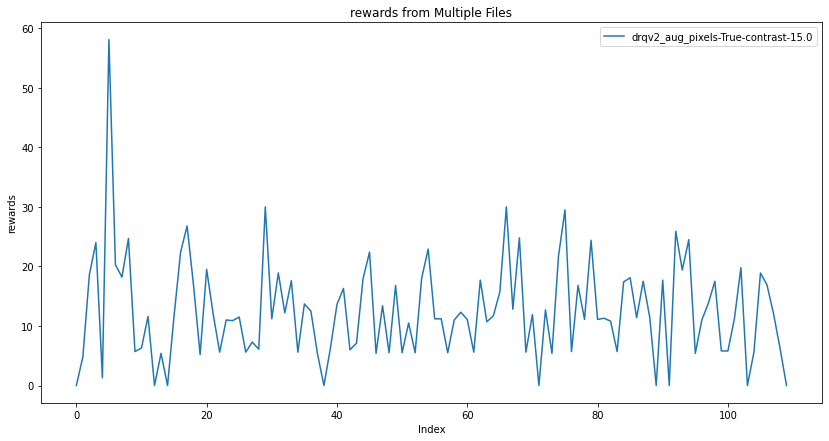

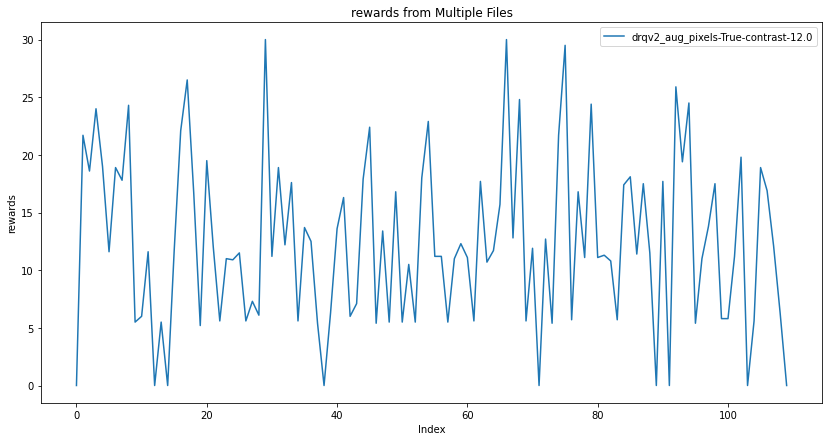

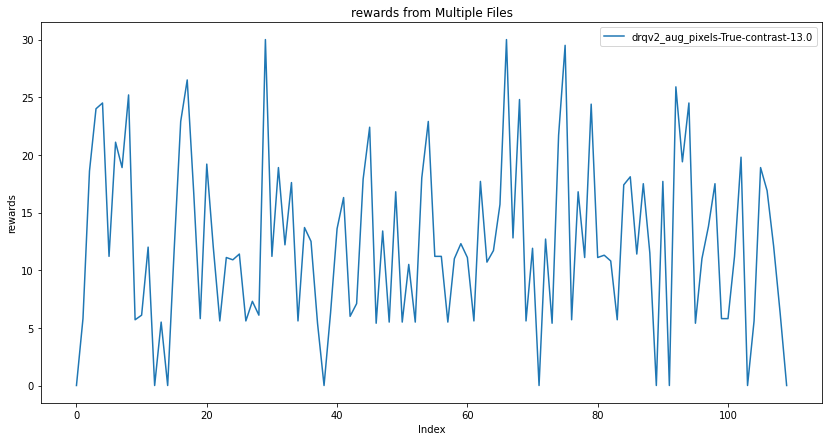

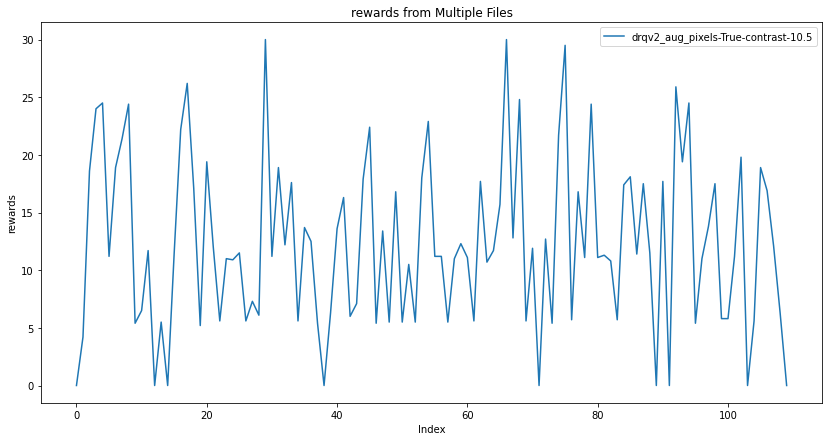

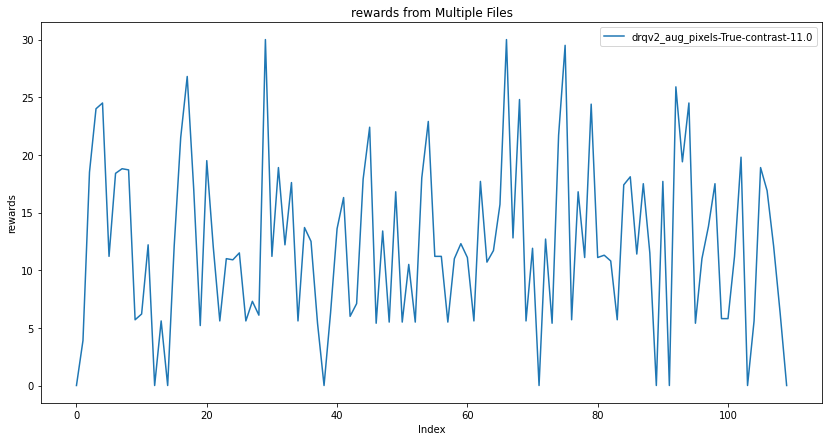

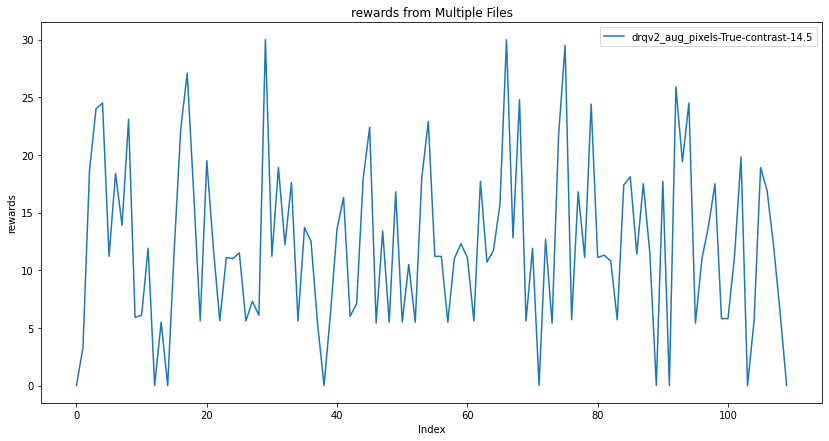

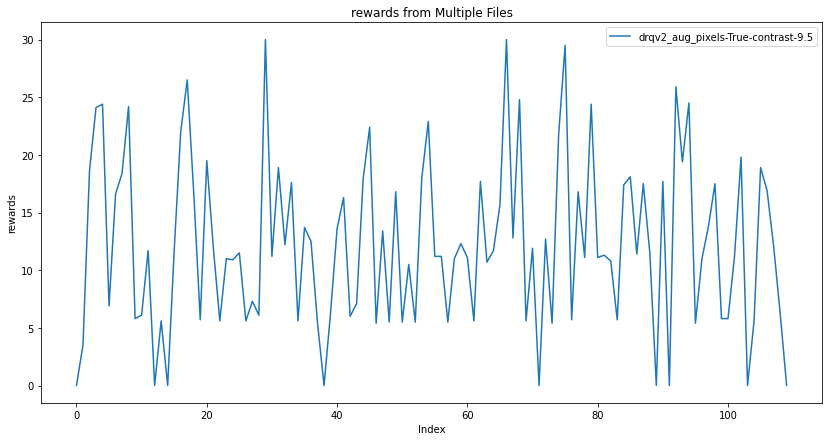

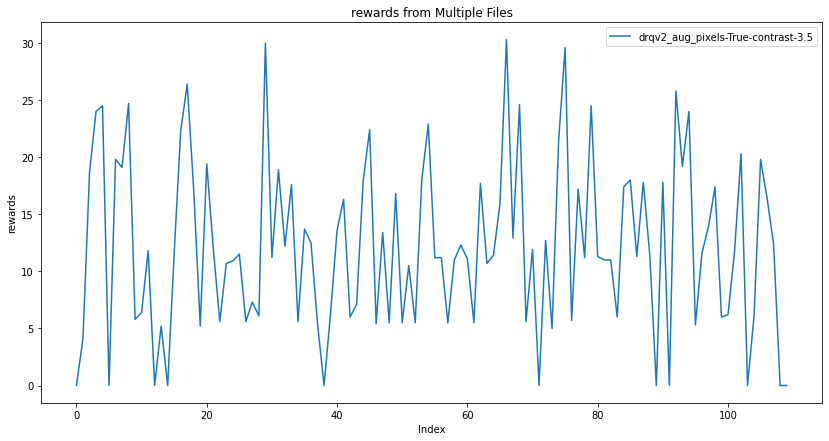

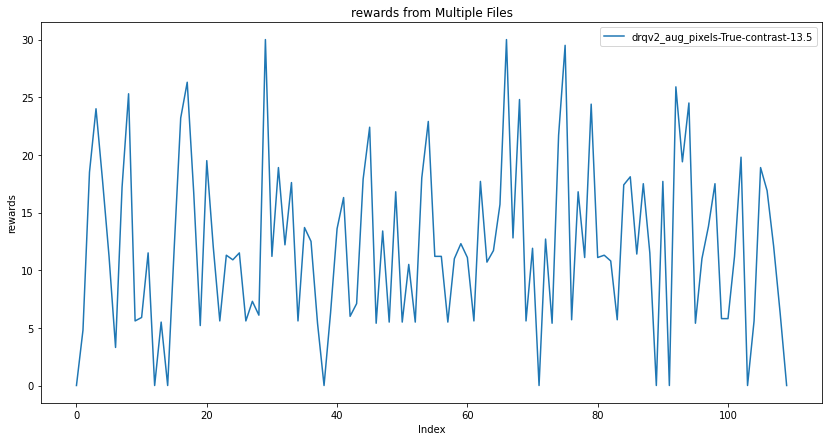

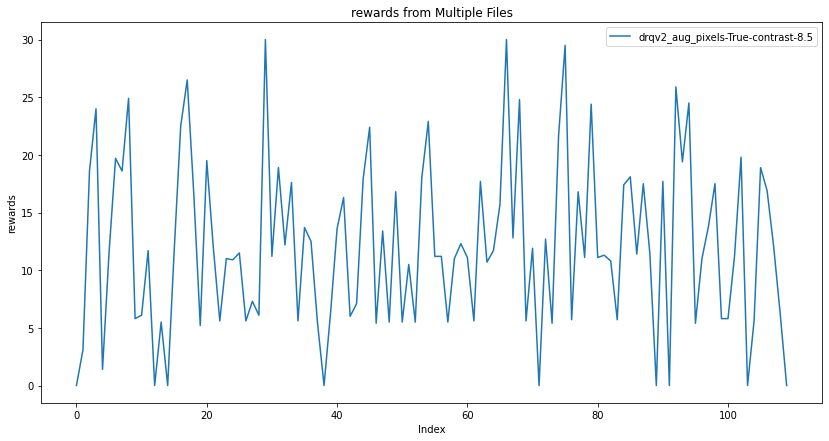

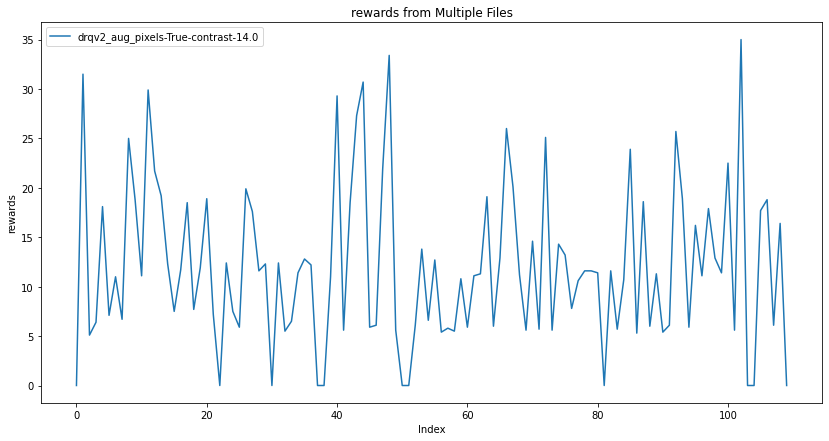

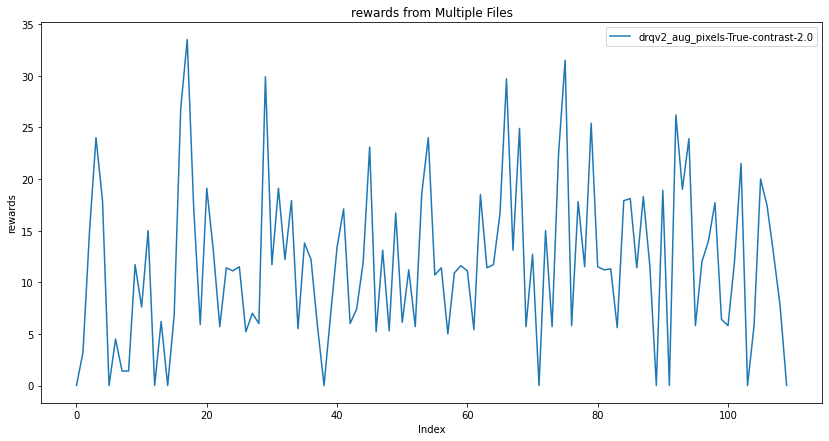

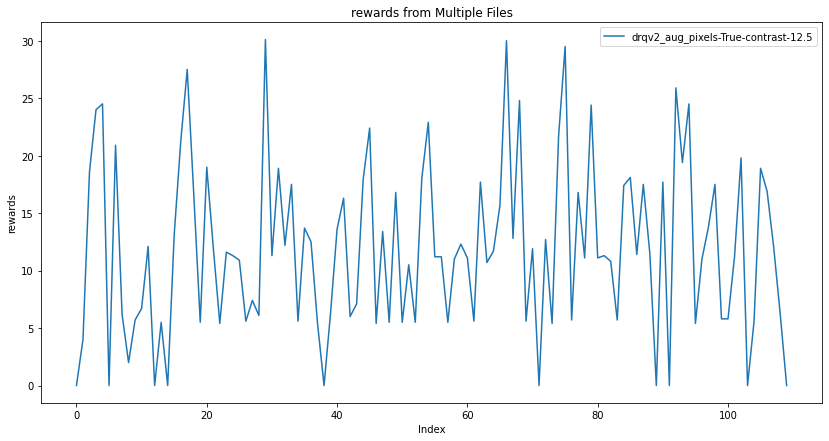

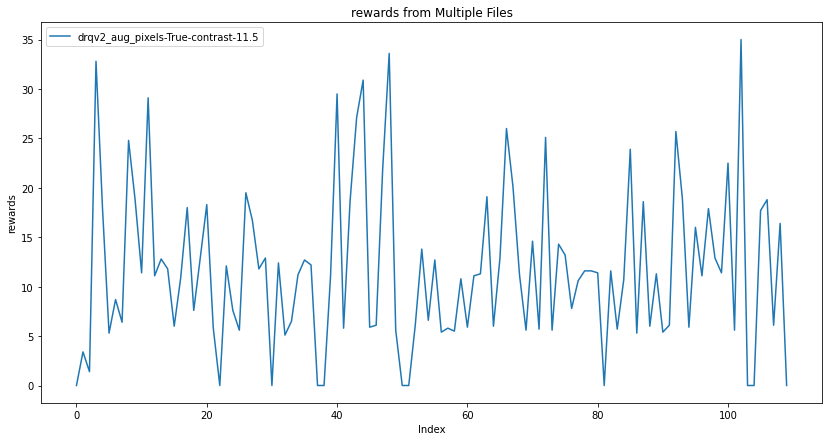

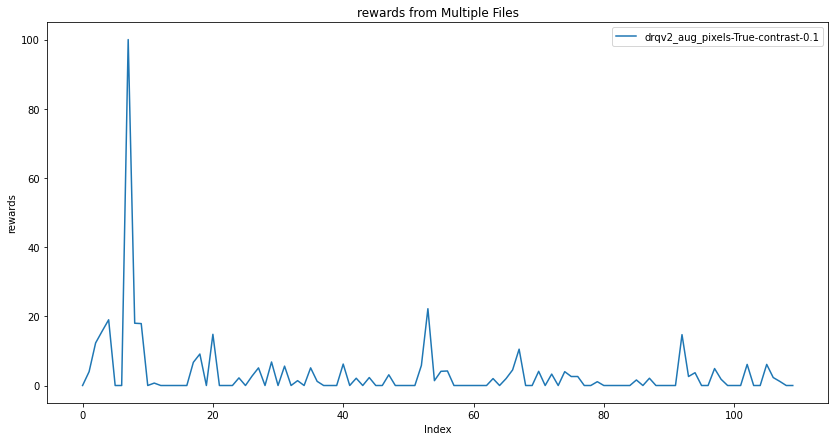

In [102]:
for column in sorted_columns_contrast:
    plot_column(df_rewards_contrast[column], column, 'rewards')

4      1.0
14     2.0
11     3.0
12     4.0
13     5.0
5      6.0
3      7.0
6      8.0
2      9.0
1     10.0
0     11.0
7     12.0
10    13.0
9     14.0
8     15.0
Name: file_short, dtype: float64
    bhattacharyya   chebyshev  cosine_dist     euclidian  frame     hamming  \
5      -17.539856  224.835949     0.017258  28292.563145  501.0  550204.466   
11     -17.541611  224.283969     0.010937  27570.526570  501.0  532050.786   
12     -17.541061  224.607985     0.013232  27819.969055  501.0  542848.760   
13     -17.540284  224.917774     0.015470  28069.288531  501.0  548344.808   
14     -17.542338  223.569961     0.007956  27272.683078  501.0  521489.702   

         kl_div     manhattan  mu_augment  mu_original  sigma_augment  \
5   5541292.152  1.637316e+07   74.884027    74.902264      33.154374   
11  5248570.341  1.582136e+07   74.898977    74.902264      33.187361   
12  5345231.960  1.601134e+07   74.901007    74.902264      33.185010   
13  5462020.699  1.620199e+07   74.

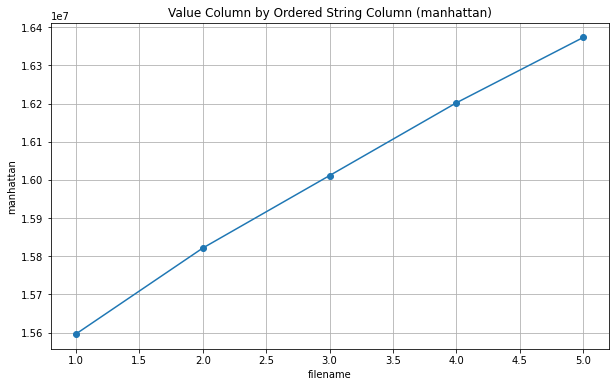

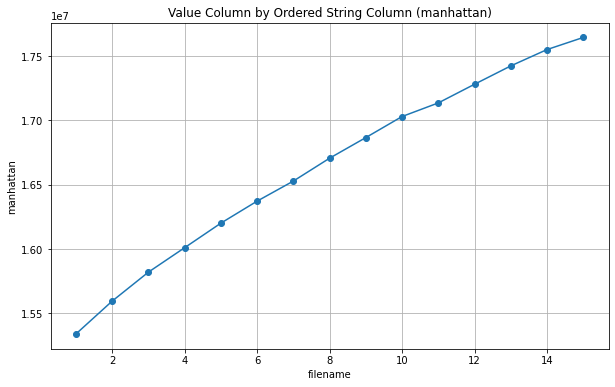

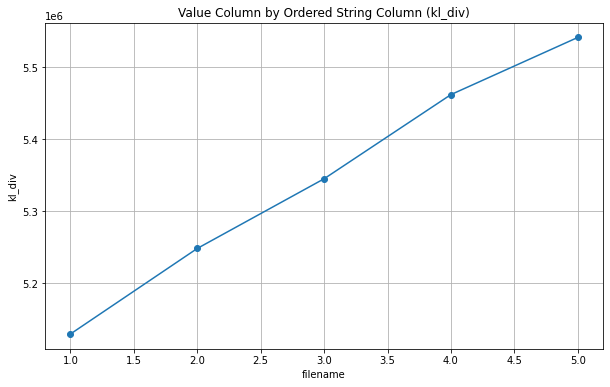

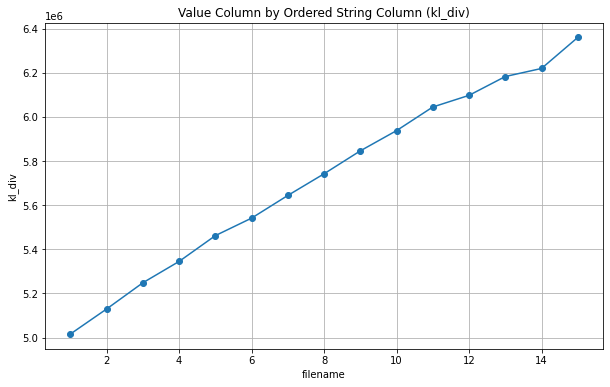

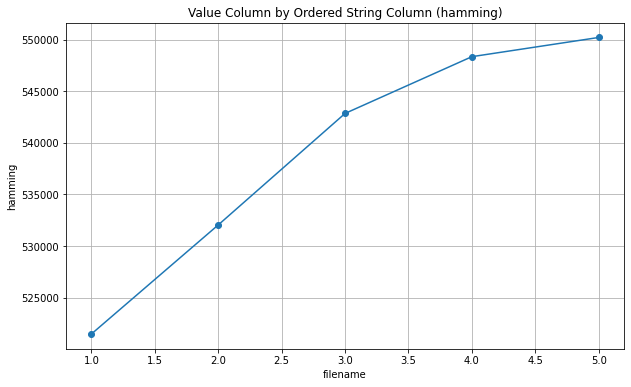

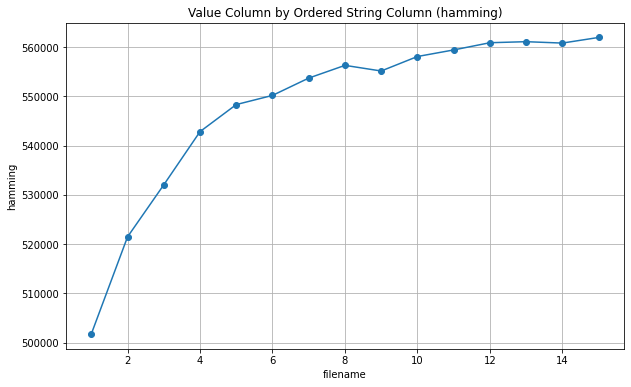

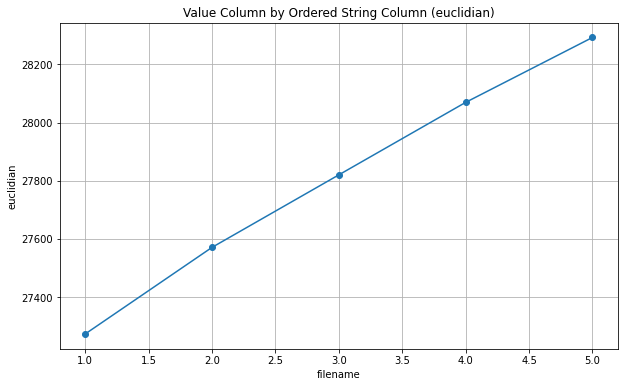

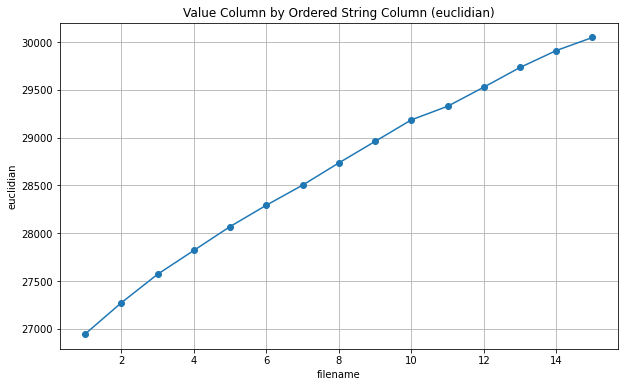

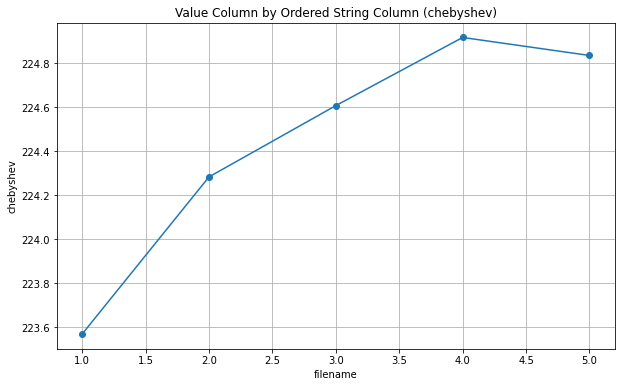

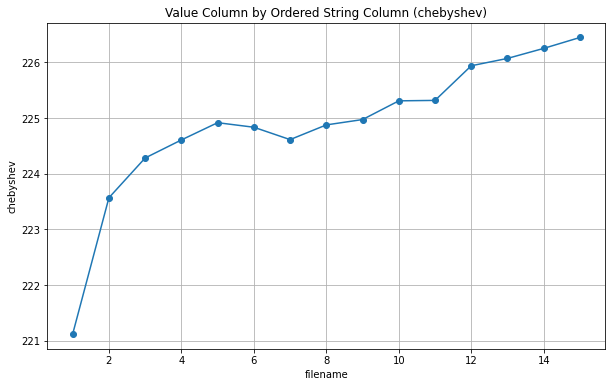

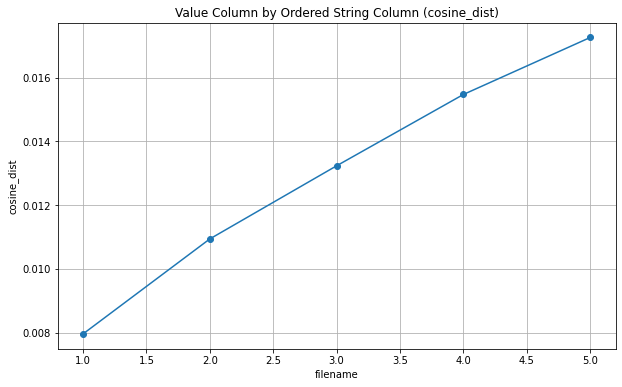

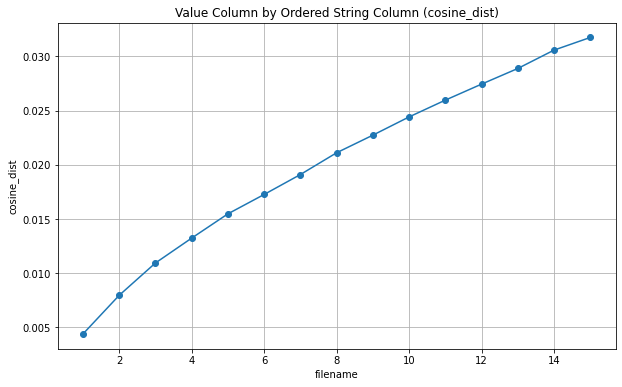

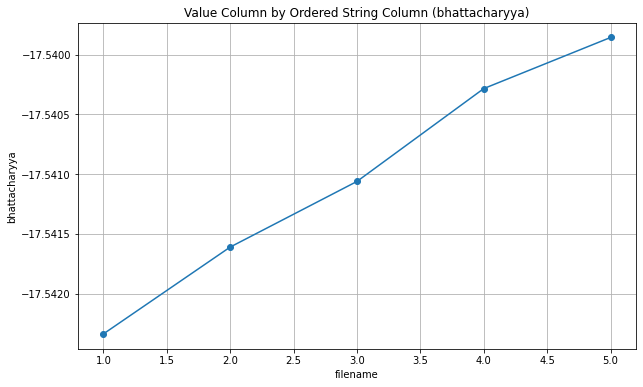

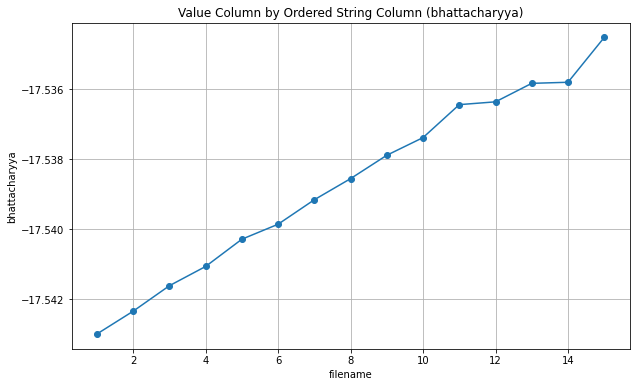

In [105]:
aggregated_stats_shift = '/Users/victor/Documents/python-projects/smart-rl/aggregate/shift/all-stats-average-shift-all.csv'
df_stats_shift = pd.read_csv(aggregated_stats_shift)
df_stats_shift['file_short'] = df_stats_shift['file'].str[60:80].str.split("/").str[0].str.split("-").str[-1].astype(float)

df_sorted_shift = df_stats_shift.sort_values('file_short')
print(df_sorted_shift['file_short'])


# ...printing MAX Reqards per evaluation...
#      915.30000000000 | drqv2_pad_3_pixels-True
#      914.90000000000 | drqv2_pad_2_pixels-True
#      914.60000000000 | drqv2_pad_5_pixels-True
#      913.90000000000 | drqv2_pad_6_pixels-True
#      912.70000000000 | drqv2_pad_4_pixels-True
df_filtered_shift = df_stats_shift[df_stats_shift['file_short'].isin([3, 2, 5, 6, 4])]
print(df_filtered_shift)

    
for name in stats_column_names:
    extract_and_plot(df_filtered_shift, name, 5, use_index=True)
    extract_and_plot(df_stats_shift, name, 50)
    

5      0.0
10     0.1
33     0.2
37     0.3
38     0.4
32     0.5
11     0.6
19     0.7
14     0.8
17     0.9
8      1.0
23     1.1
0      1.2
3      1.3
2      1.4
1      1.5
22     1.6
24     1.7
21     1.8
25     1.9
29     2.0
34     2.1
12     2.2
18     2.3
16     2.4
13     2.5
26     3.0
27     4.0
28     5.0
9      6.0
4      7.0
7      8.0
6      9.0
15    10.0
20    11.0
35    12.0
31    13.0
30    14.0
36    15.0
Name: file_short, dtype: float64
    bhattacharyya  chebyshev  cosine_dist     euclidian  frame     hamming  \
11     -17.543642    199.154     0.000000  26577.308379  501.0  382984.648   
13     -17.543060    209.596     0.002946  26877.571805  501.0  493257.444   
14     -17.543549    199.154     0.000249  26611.797160  501.0  408769.660   
19     -17.543628    199.154     0.000038  26582.604148  501.0  387268.648   
32     -17.543642    199.154     0.000000  26577.308379  501.0  382984.648   

         kl_div     manhattan  mu_augment  mu_original  sigma_augment

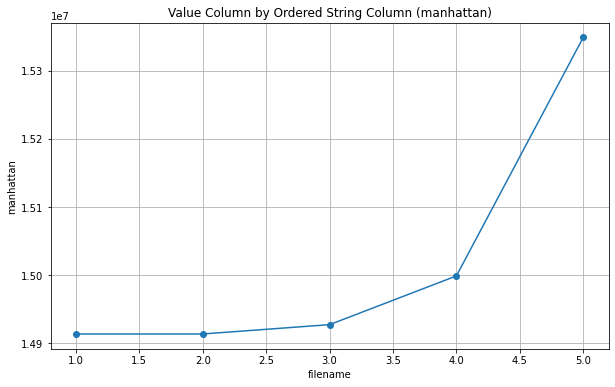

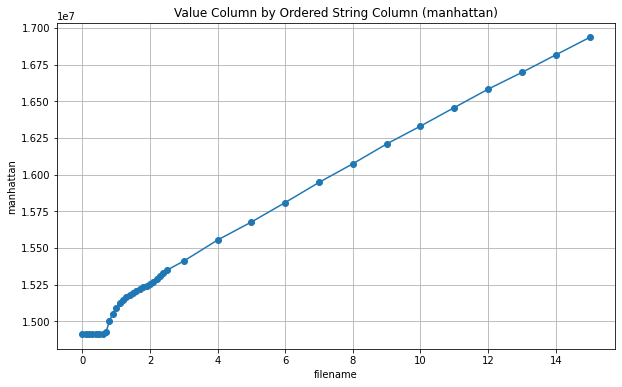

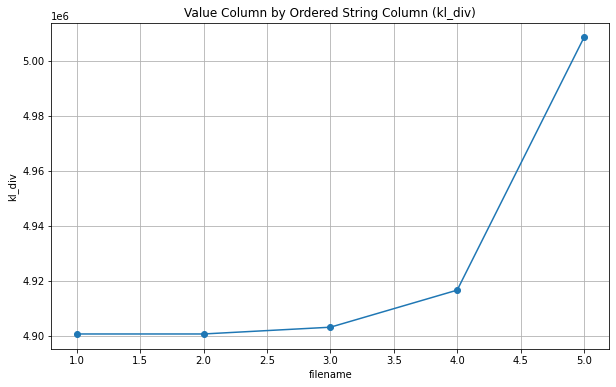

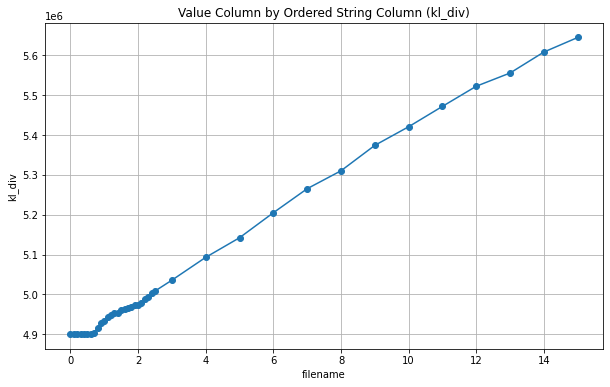

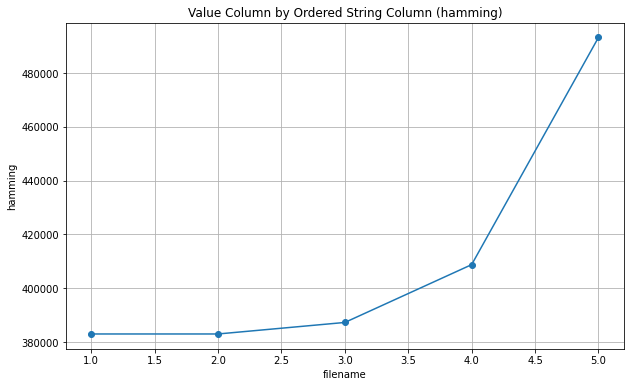

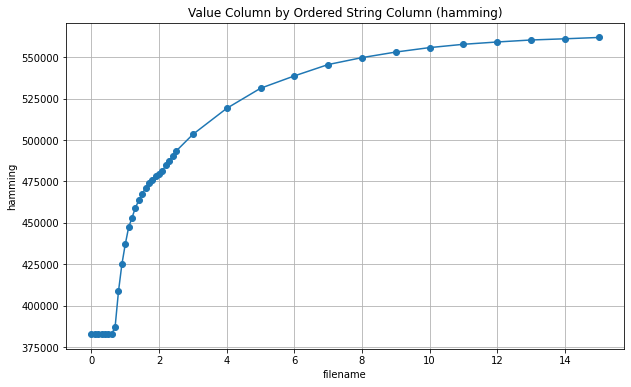

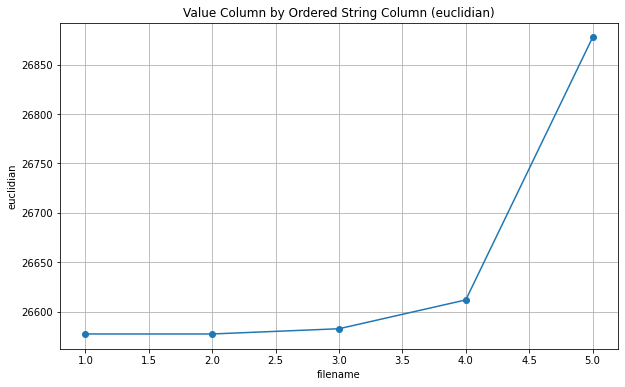

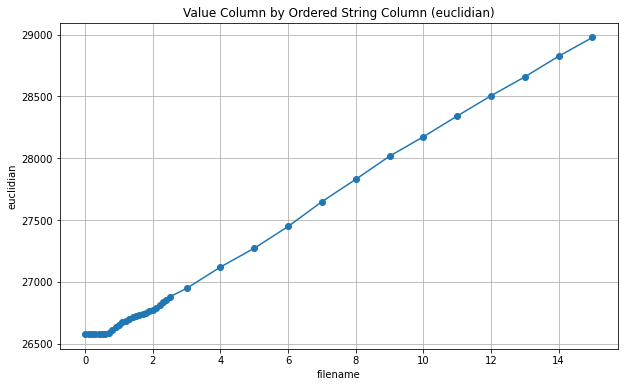

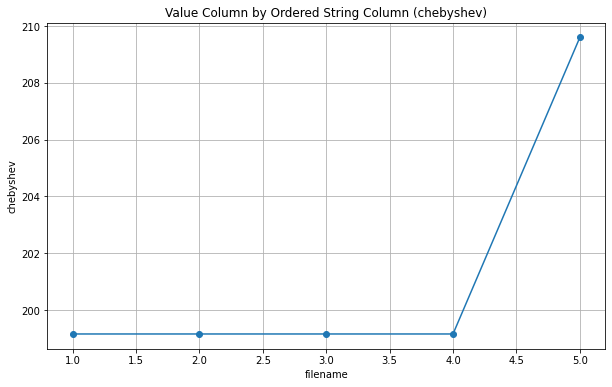

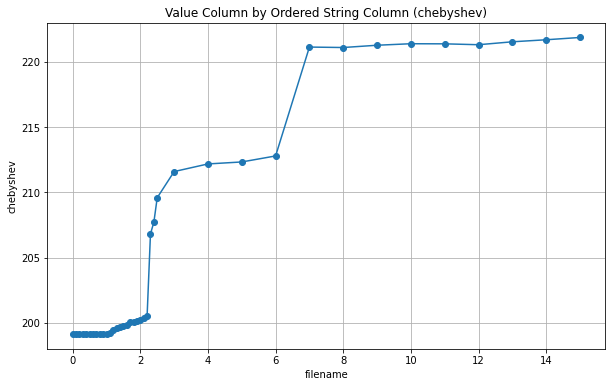

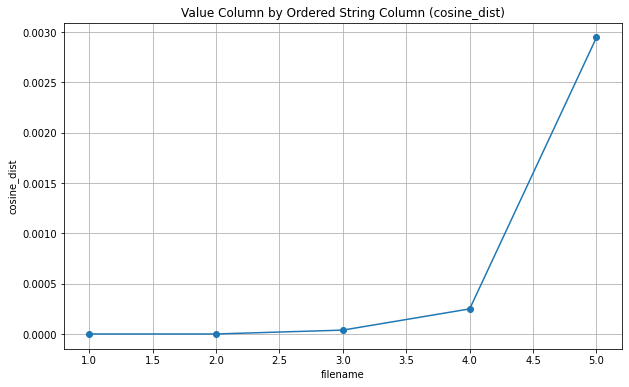

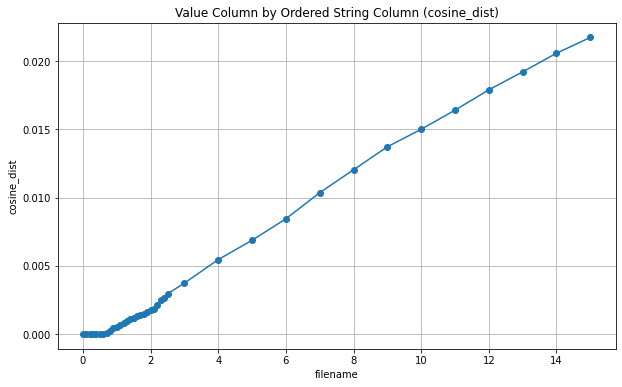

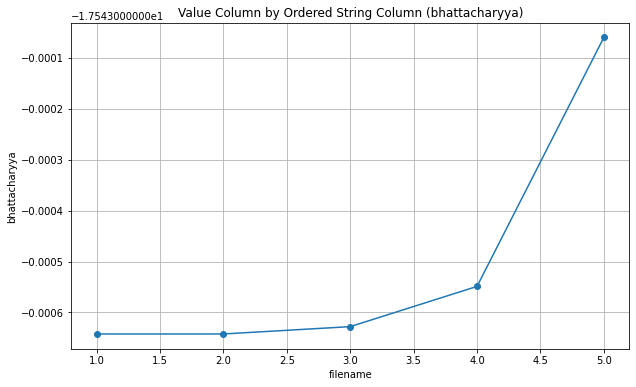

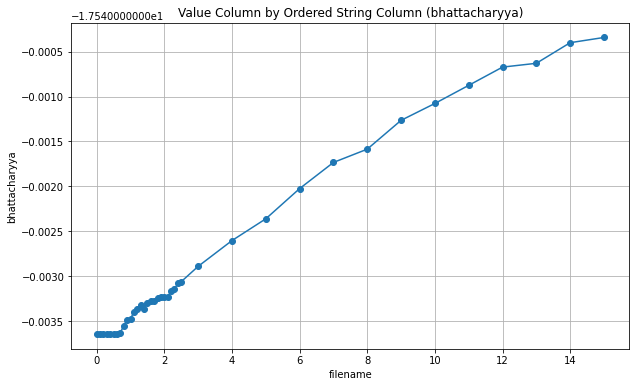

In [106]:
aggregated_stats_rot = '/Users/victor/Documents/python-projects/smart-rl/aggregate/rotate/all-stats-average-rotate-all.csv'
df_stats_rot = pd.read_csv(aggregated_stats_rot)
df_stats_rot['file_short'] = df_stats_rot['file'].str[60:80].str.split("/").str[0].str.split("-").str[-1].astype(float)

df_sorted_rot = df_stats_rot.sort_values('file_short')
print(df_sorted_rot['file_short'])

# ...printing MAX Reqards per evaluation...
#      912.90000000000 | drqv2_aug_pixels-True-rotate-0.7
#      900.20000000000 | drqv2_aug_pixels-True-rotate-0.6
#      899.10000000000 | drqv2_aug_pixels-True-rotate-0.5
#      898.20000000000 | drqv2_aug_pixels-True-rotate-0.8
#      896.10000000000 | drqv2_aug_pixels-True-rotate-2.5
df_filtered_rot = df_stats_rot[df_stats_rot['file_short'].isin([0.7, 0.6, 0.5, 0.8, 2.5])]
print(df_filtered_rot)

    
for name in stats_column_names:
    extract_and_plot(df_filtered_rot, name, 5, use_index=True)
    extract_and_plot(df_rewards_rot, name, 50)
    

17     0.1
45     0.2
47     0.3
48     0.4
43     0.5
44     0.5
20     0.6
21     0.7
15     0.8
22     0.9
9      1.0
10     1.0
31     1.1
4      1.2
14     1.3
13     1.4
5      1.5
6      1.5
28     1.6
37     1.7
33     1.8
36     1.9
41     2.0
16     2.5
34     3.0
32     3.5
35     4.0
46     4.5
39     5.0
12     5.5
11     6.0
23     6.5
2      7.0
38     7.5
8      8.0
18     8.5
3      9.0
29     9.5
1     10.0
30    10.5
0     11.0
19    11.5
25    12.0
7     12.5
26    13.0
42    13.5
27    14.0
40    14.5
24    15.0
Name: file_short, dtype: float64
    bhattacharyya   chebyshev  cosine_dist     euclidian  frame     hamming  \
15     -17.543672  194.834153     0.001557  26521.987621  501.0  571536.000   
16            NaN  511.686367     0.061173  39173.492219  501.0  571536.000   
20     -17.542738  192.160551     0.006397  26935.802746  501.0  571536.000   
21     -17.543324  193.325149     0.003553  26670.729645  501.0  571535.996   
43     -17.541915  192.664659    

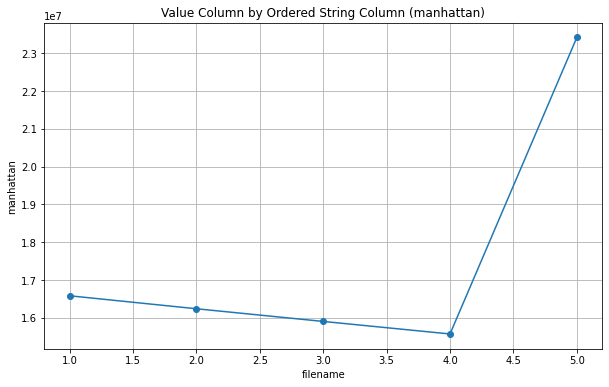

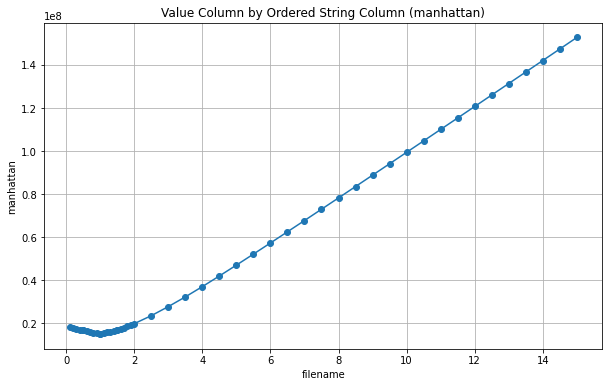

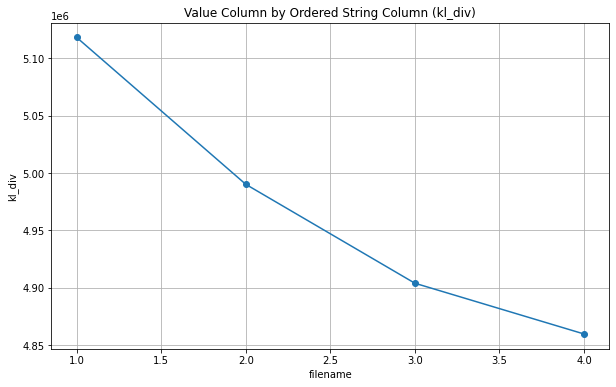

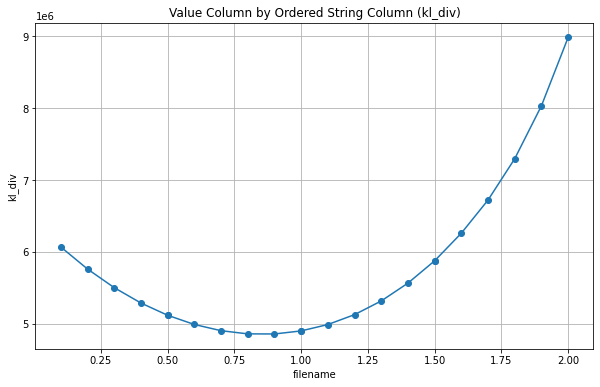

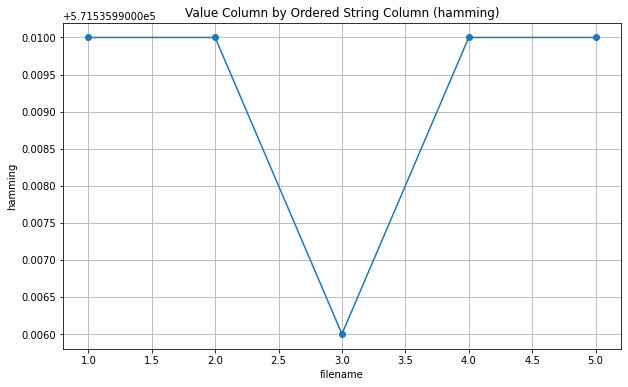

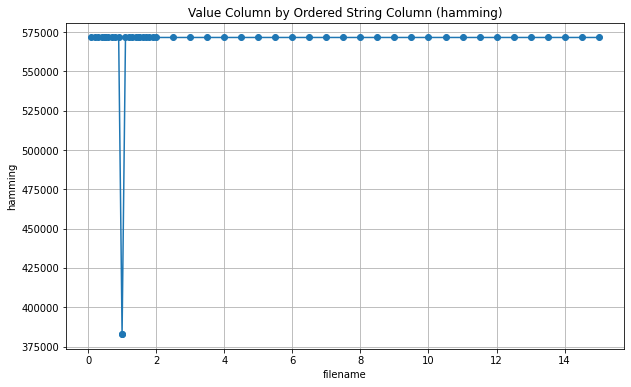

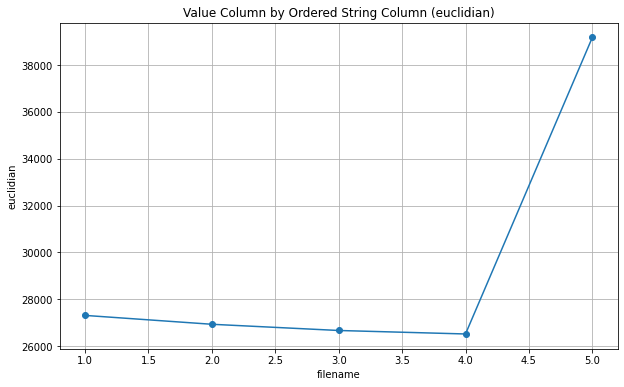

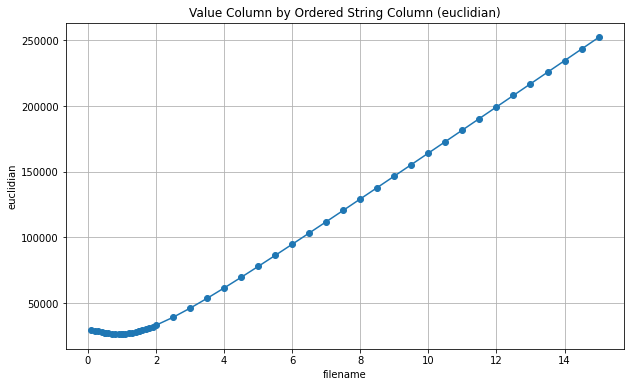

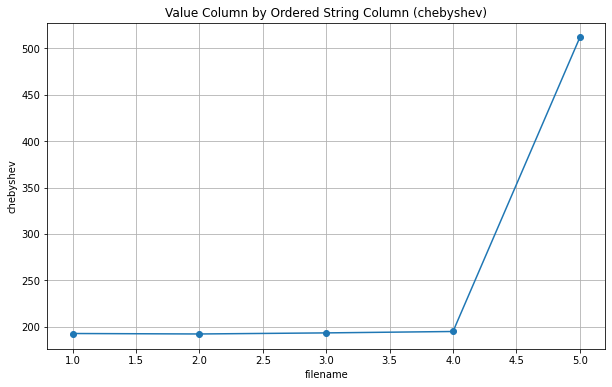

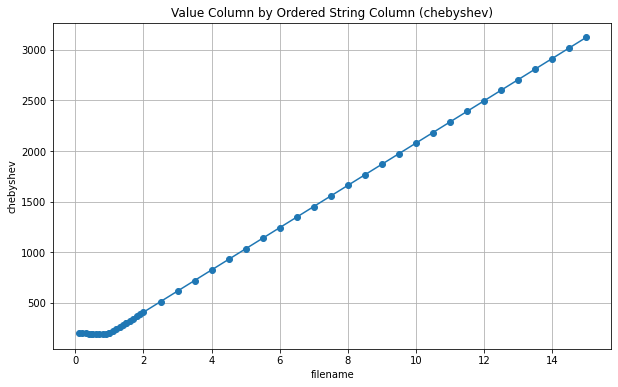

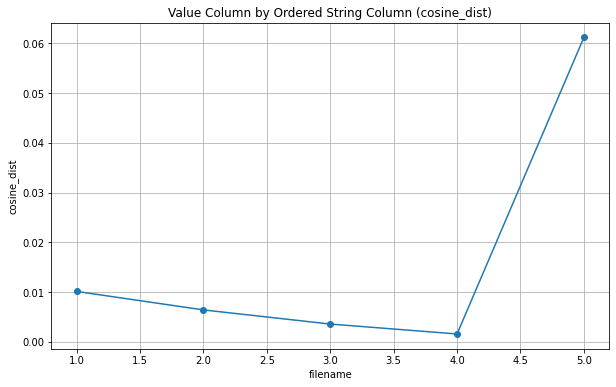

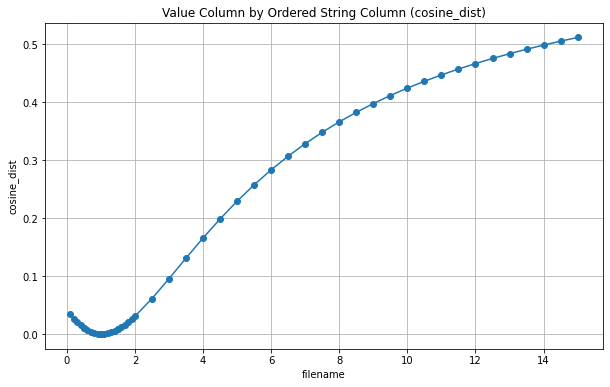

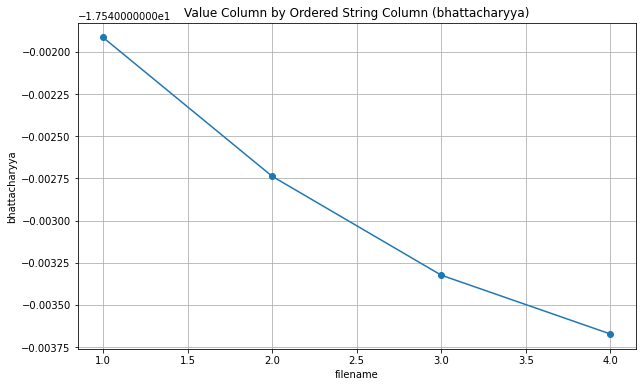

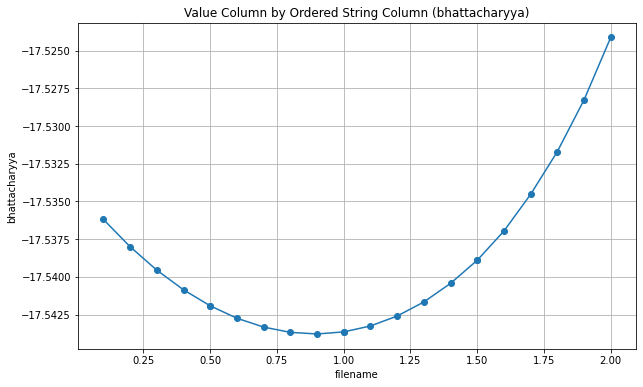

In [108]:
aggregated_stats_contrast = '/Users/victor/Documents/python-projects/smart-rl/aggregate/contrast/all-stats-average-contrast-all.csv'
df_stats_contrast = pd.read_csv(aggregated_stats_contrast)
df_stats_contrast['file_short'] = df_stats_contrast['file'].str[60:80].str.split("/").str[0].str.split("-").str[-1].astype(float)

df_sorted_contrast = df_stats_contrast.sort_values('file_short')
print(df_sorted_contrast['file_short'])

# ...printing MAX Reqards per evaluation...
#      912.90000000000 | drqv2_aug_pixels-True-rotate-0.7
#      900.20000000000 | drqv2_aug_pixels-True-rotate-0.6
#      899.10000000000 | drqv2_aug_pixels-True-rotate-0.5
#      898.20000000000 | drqv2_aug_pixels-True-rotate-0.8
#      896.10000000000 | drqv2_aug_pixels-True-rotate-2.5
df_filtered_contrast = df_stats_contrast[df_stats_contrast['file_short'].isin([0.7, 0.6, 0.5, 0.8, 2.5])]
print(df_filtered_contrast)

  
for name in stats_column_names:
    extract_and_plot(df_filtered_contrast.head(5), name, 5, use_index=True)
    extract_and_plot(df_stats_contrast, name, 50)
    

23    0.10
11    0.20
7     0.30
8     0.40
9     0.50
24    0.60
22    0.70
26    0.80
16    0.85
19    0.90
13    0.95
0     1.00
10    1.05
5     1.10
17    1.20
15    1.30
14    1.40
18    1.50
4     1.60
1     1.70
3     1.80
2     1.90
6     2.00
12    2.10
25    2.20
21    2.30
20    2.40
27    2.50
Name: file_short, dtype: float64
    bhattacharyya  chebyshev  cosine_dist     euclidian  frame     hamming  \
0      -17.543642    199.154     0.000000  26577.308379  501.0  382984.648   
5      -17.553396    216.690     0.007205  27818.941754  501.0  552231.456   
19     -17.533432    211.950     0.004698  26836.537160  501.0  544778.746   
22     -17.508768    217.488     0.016866  27762.847777  501.0  563153.456   
26     -17.520718    220.940     0.012243  27439.295156  501.0  558958.138   

         kl_div     manhattan  mu_augment  mu_original  sigma_augment  \
0   4900666.871  1.491372e+07   74.902264    74.902264      33.188392   
5   4244478.829  1.613154e+07   76.698487   

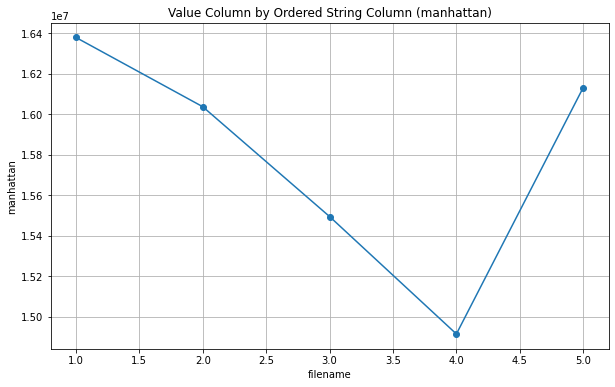

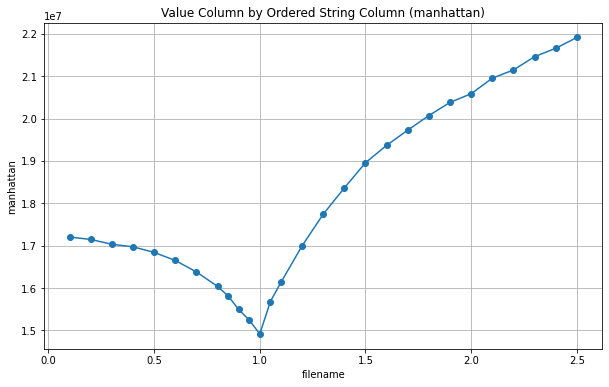

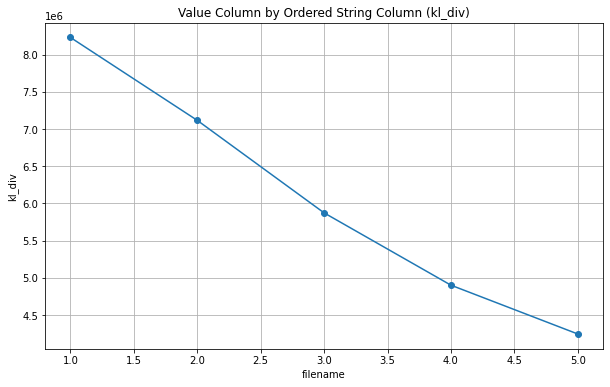

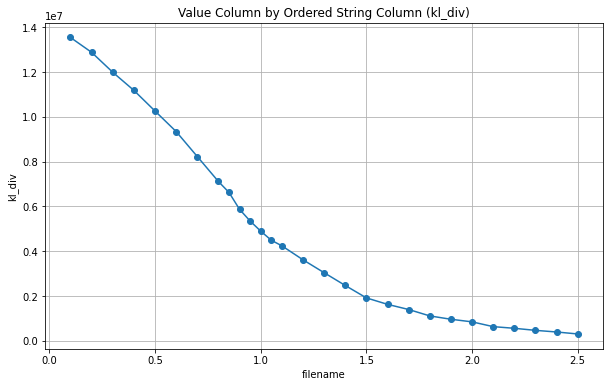

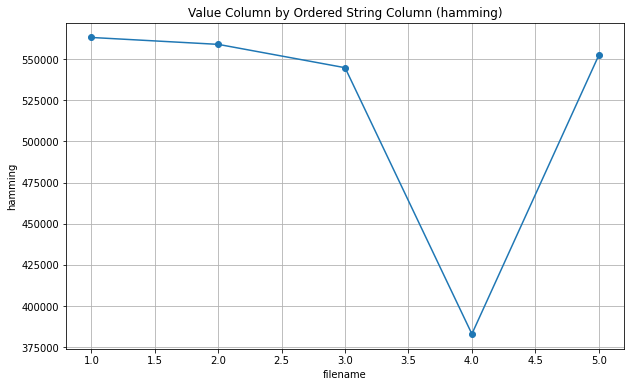

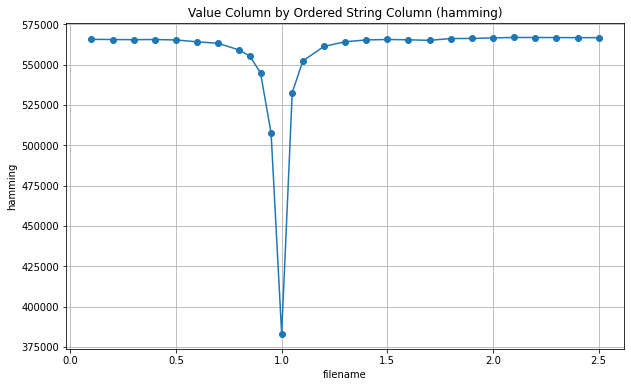

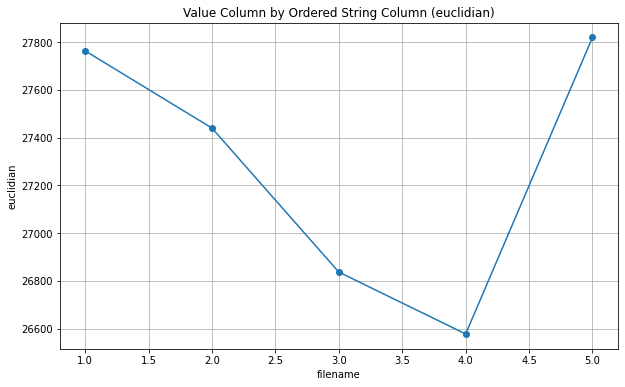

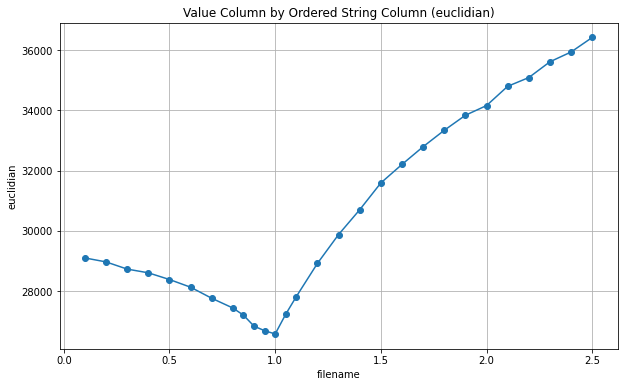

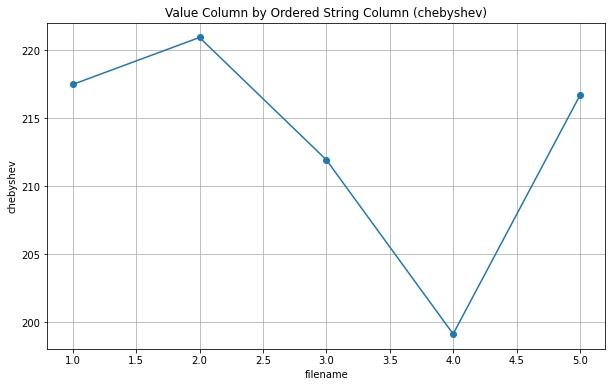

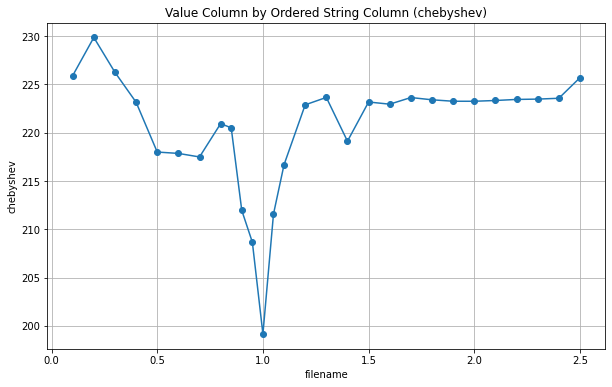

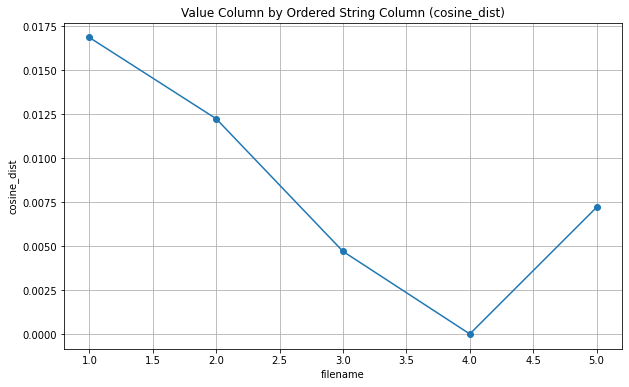

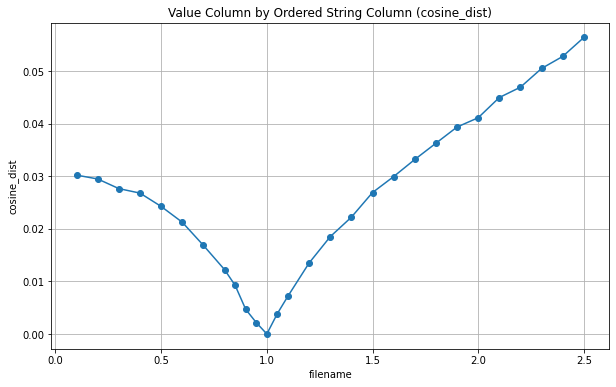

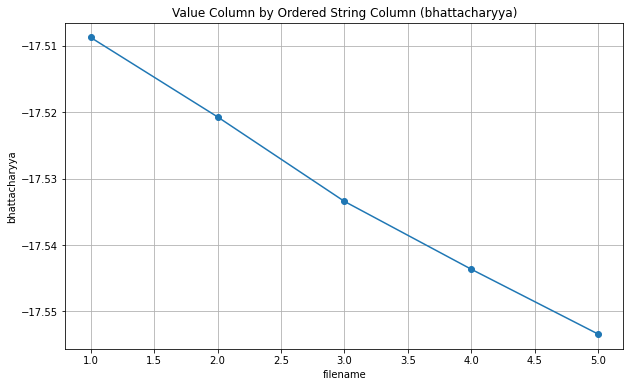

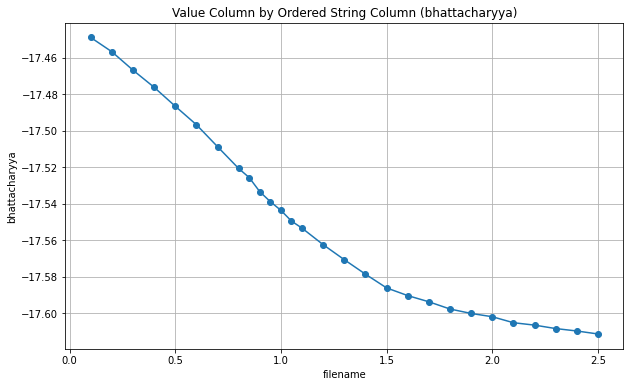

In [109]:
aggregated_stats_zoom = '/Users/victor/Documents/python-projects/smart-rl/aggregate/zoom/all-stats-average-zoom-all.csv'
df_stats_zoom = pd.read_csv(aggregated_stats_zoom)
df_stats_zoom['file_short'] = df_stats_zoom['file'].str[60:80].str.split("/").str[0].str.split("-").str[-1].astype(float)

df_sorted_zoom = df_stats_zoom.sort_values('file_short')
print(df_sorted_zoom['file_short'])


# ...printing MAX Reqards per evaluation...
# 
# 
# 
# 
# 
df_filtered_zoom = df_stats_zoom[df_stats_zoom['file_short'].isin([0.7, 0.8, 0.9, 1.0, 1.1])]
print(df_filtered_zoom)

  
for name in stats_column_names:
    extract_and_plot(df_filtered_zoom, name, 5, use_index=True)
    extract_and_plot(df_stats_zoom, name, 50)
    

25     0.9
43     1.0
53     1.1
12     1.2
5      1.3
4      1.4
14     1.5
51     1.6
44     1.7
56     1.8
42     1.9
62     2.0
64     2.1
28     2.2
27     2.3
26     2.4
30     2.5
29     2.5
55     3.0
54     3.5
57     4.0
63     4.5
41     5.0
11     5.5
3      6.0
24     6.5
15     7.0
36     7.5
6      8.0
31     8.5
13     9.0
52     9.5
48    10.0
20    10.5
37    11.0
32    11.5
7     12.0
60    12.5
19    13.0
0     13.5
18    14.0
23    14.5
8     15.0
33    15.5
34    16.0
61    16.5
49    17.0
2     17.5
39    18.0
58    18.5
47    19.0
1     19.5
40    20.0
45    21.0
17    22.0
9     23.0
10    24.0
16    25.0
46    26.0
38    27.0
50    28.0
35    29.0
22    30.0
21    31.0
59    32.0
Name: file_short, dtype: float64
    bhattacharyya  chebyshev  cosine_dist     euclidian  frame   hamming  \
16     -15.198749    254.974     0.122538  61349.112547  501.0  571536.0   
19     -15.254143    254.970     0.113385  61320.136430  501.0  571536.0   
22     -15.174471    254

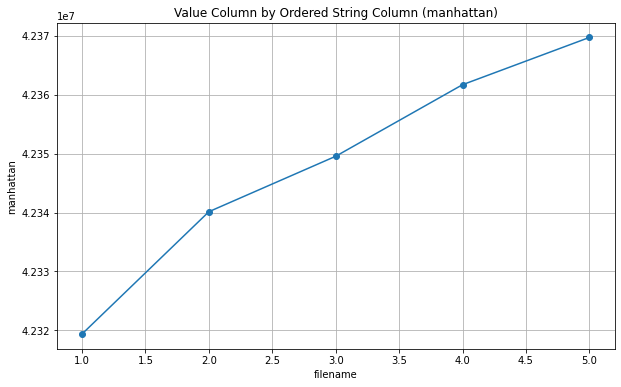

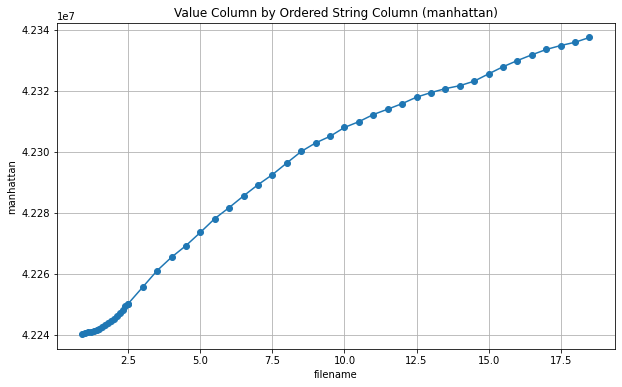

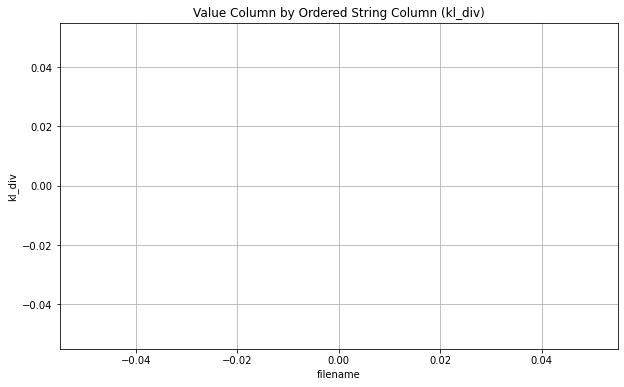

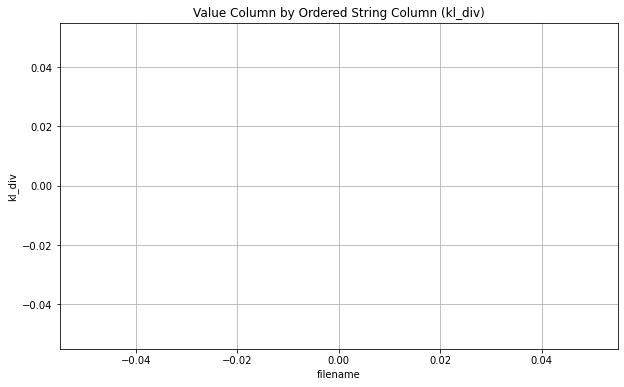

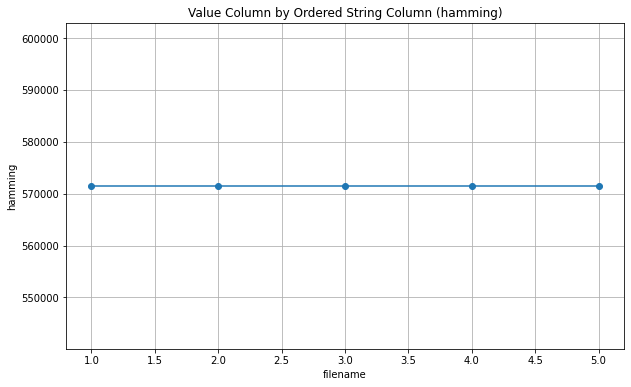

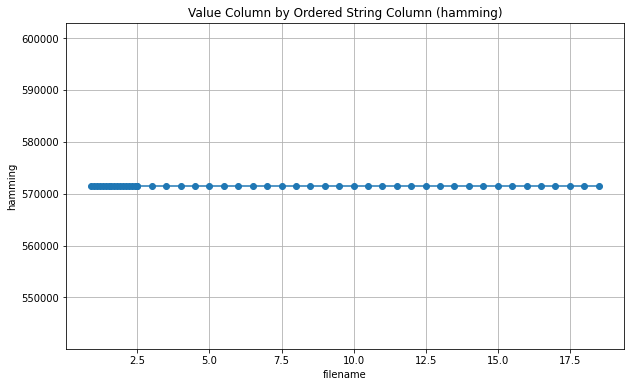

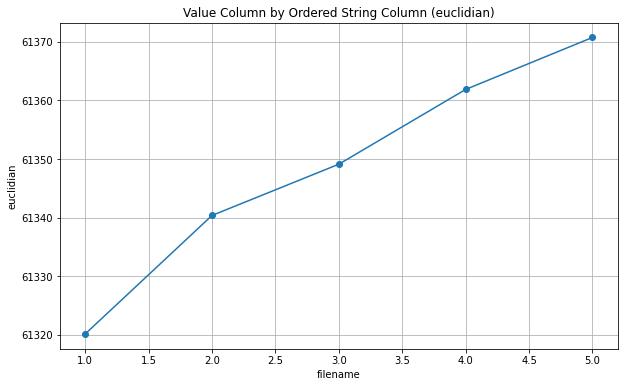

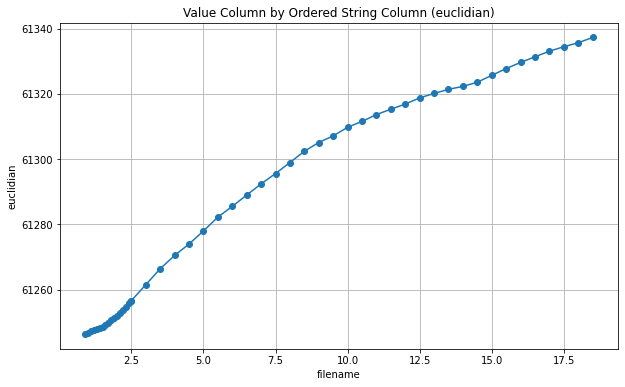

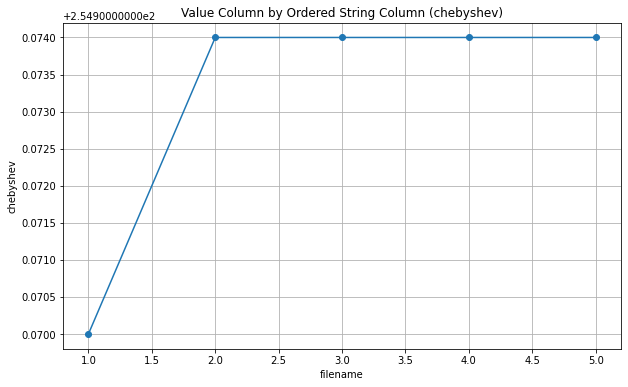

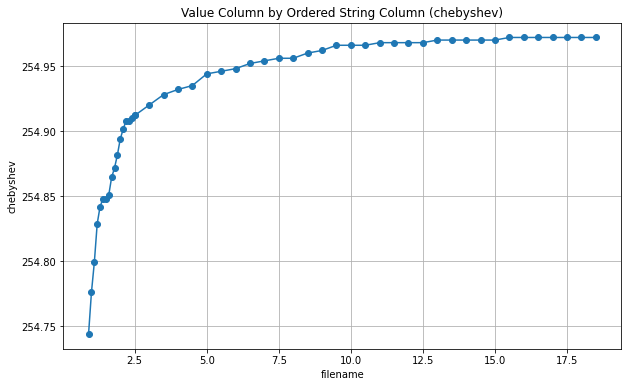

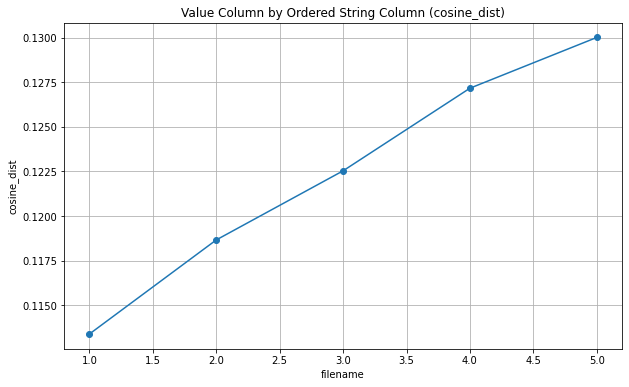

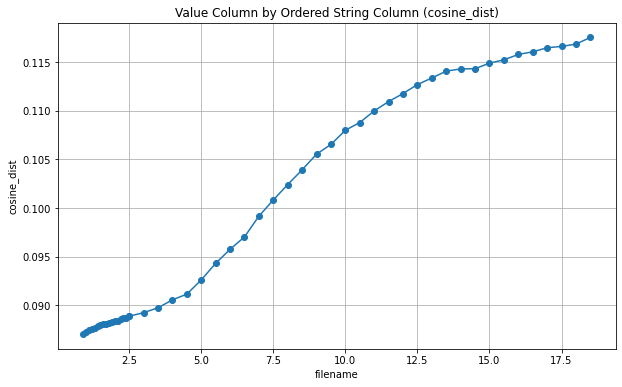

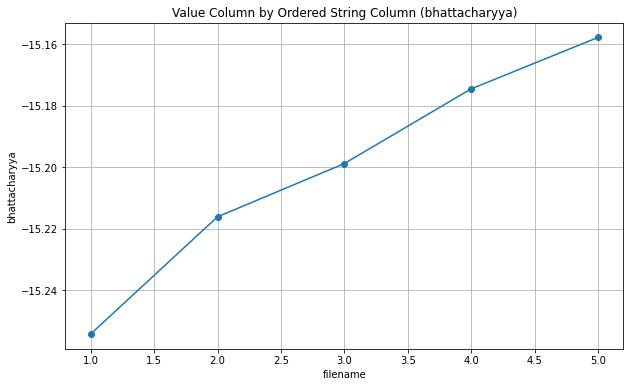

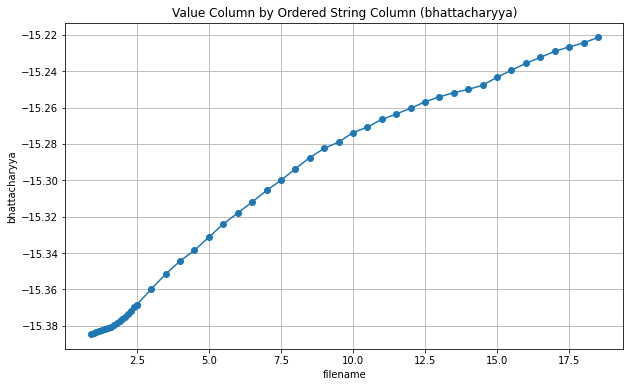

In [110]:
aggregated_rewards_sharp = '/Users/victor/Documents/python-projects/smart-rl/aggregate/sharp/all-stats-average-sharp-all.csv'
df_stats_sharp = pd.read_csv(aggregated_rewards_sharp)
df_stats_sharp['file_short'] = df_stats_sharp['file'].str[60:80].str.split("/").str[0].str.split("-").str[-1].astype(float)

df_sorted_sharp = df_stats_sharp.sort_values('file_short')
print(df_sorted_sharp['file_short'])


# ...printing MAX Reqards per evaluation...
# 
# 
# 
# 
# 
df_filtered_sarp = df_stats_sharp[df_stats_sharp['file_short'].isin([13, 20, 25, 30, 32])]
print(df_filtered_sarp)

  
for name in stats_column_names:
    extract_and_plot(df_filtered_sarp, name, 5, use_index=True)
    extract_and_plot(df_stats_sharp, name, 50)
    

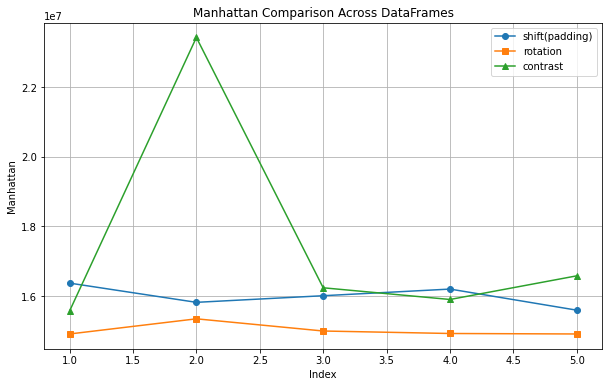

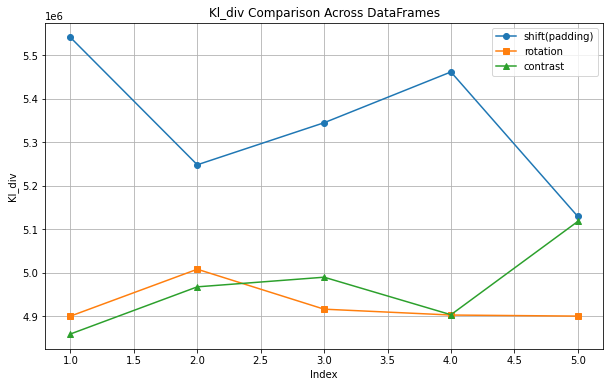

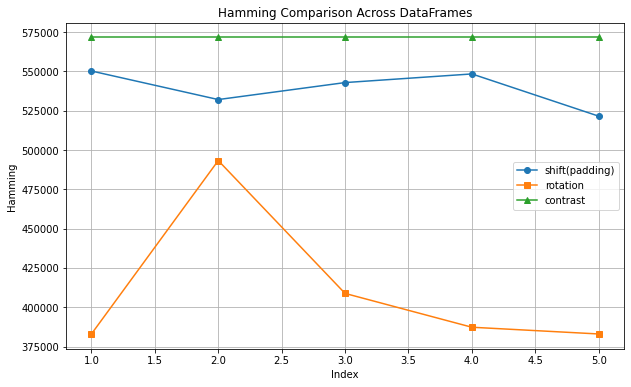

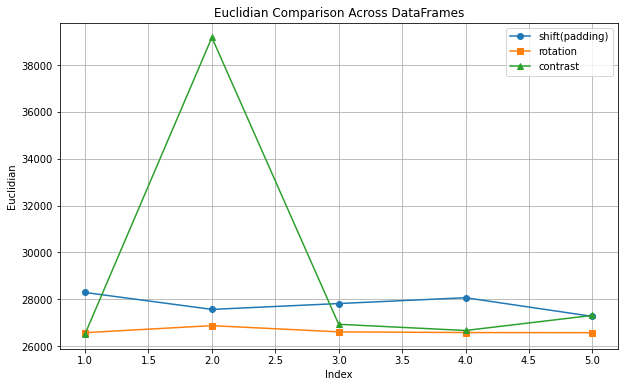

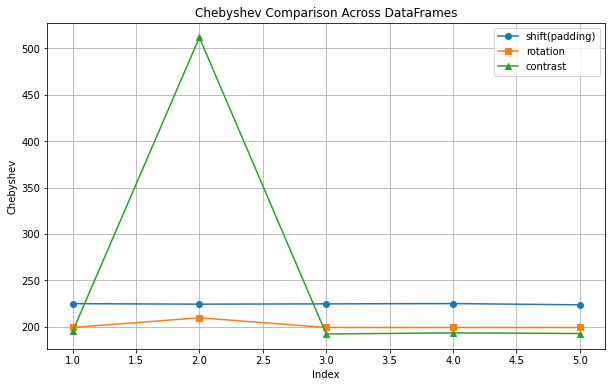

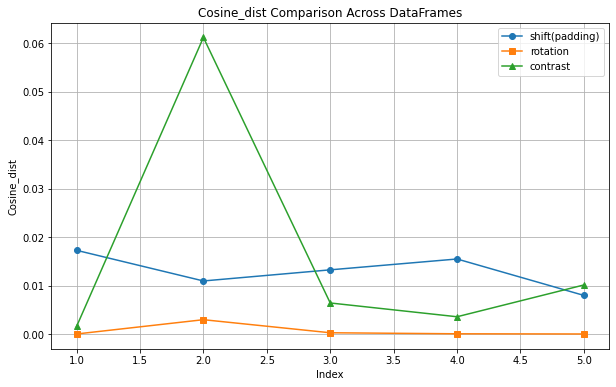

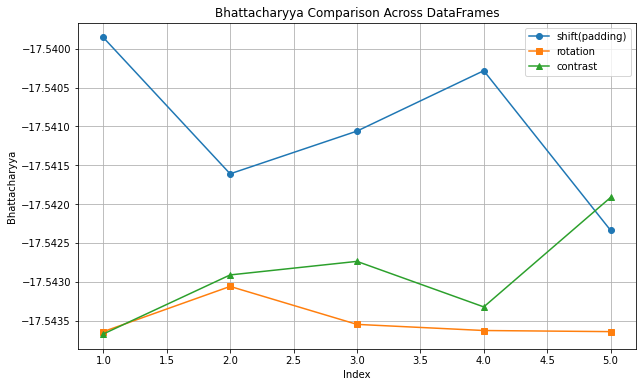

In [112]:
def plot_column_from_dataframes(df1, df2, df3, column_name, labels_list):
#     # Handle NaN values (e.g., by filling with the mean of each column)
#     df1.fillna(df1.mean(), inplace=True)
#     df2.fillna(df2.mean(), inplace=True)
#     df3.fillna(df3.mean(), inplace=True)
    
    # Determine the number of entries
    num_entries = len(df1)

    # Create an index for the number of entries
    index = list(range(1, num_entries + 1))

    # Plotting the specified column from each DataFrame
    plt.figure(figsize=(10, 6))

    plt.plot(index, df1[column_name], label=labels_list[0], marker='o')
    plt.plot(index, df2[column_name], label=labels_list[1], marker='s')
    plt.plot(index, df3[column_name], label=labels_list[2], marker='^')

    plt.xlabel('Index')
    plt.ylabel(column_name.capitalize())
    plt.title(f'{column_name.capitalize()} Comparison Across DataFrames')
    plt.legend()
    plt.grid(True)

    plt.show()
    
    
labels_list = ['shift(padding)', 'rotation', 'contrast']
    
    
for stats_type in stats_column_names:
    plot_column_from_dataframes(
        df_filtered_shift, 
        df_filtered_rot, 
        df_filtered_contrast.head(5), 
        stats_type, labels_list
    )
